# Modelo Preditivo - Grupo Genesis



## Introdução

O câncer de mama é uma das formas mais comuns de câncer que afeta milhões de mulheres em todo o mundo. Atualmente, os tratamentos "adjuvantes" e "neoadjuvantes" são duas das principais opções terapêuticas disponíveis para pacientes com câncer de mama. No entanto, ainda nos dias atuais, escolher o melhor tipo de tratamento pode ser um desafio para os médicos, pois a escolha depende de diversos fatores.

Neste contexto, o grupo Genesis, composto por alunos do Inteli (Instituto de tecnologia e liderança) em colaboração com a Escola de Medicina da Universidade de São Paulo e o ICESP (Instituto do Câncer do Estado de São Paulo) desenvolveu um modelo preditivo para ajudar os médicos a escolher o melhor tipo de tratamento para o câncer mencionado. O objetivo do projeto foi criar um sistema que utilize informações de pacientes diagnosticados com a enfermidade para fornecer recomendações de tratamento mais personalizadas.

Para alcançar este objetivo, os alunos utilizaram técnicas de análise de dados e aprendizado de máquina para criar um modelo que utiliza informações clínicas para recomendar o melhor tipo de tratamento para cada paciente. O modelo foi treinado e validado usando um grande conjunto de dados de pacientes com câncer de mama, o que permitiu que os alunos otimizassem o desempenho do modelo e avaliassem sua eficácia.

Os resultados do projeto mostram que o modelo preditivo desenvolvido pelos alunos é capaz de fornecer recomendações de tratamento altamente personalizadas para pacientes com câncer de mama. Isso pode ajudar os médicos a escolher a melhor opção terapêutica para cada paciente, o que pode melhorar significativamente a eficácia do tratamento e a qualidade de vida das pacientes. O projeto representa uma importante contribuição para a medicina personalizada e a luta contra o câncer de mama.

## Importação das bibliotecas necessárias

Para iniciar a confecção do modelo, serão primeiramente necessários o carregamento das bibliotecas que serão utilizadas. Além disso, o Google Drive é montado para que a os dados sejam importados diretamente de um servidor de *cloud*, facilitando a captação de dados e evitando o armazenamento de informações nas maquinas dos integrantes do grupo.

As bibliotecas utilizadas serão a **NumPy** e a **Pandas**. A primeira permite, entre outros recursos, o suporte para operações matemáticas em matrizes e vetores multidimensionais de forma eficiente. A biblioteca Pandas promove um conjunto de ferramentas fundamentais para a análise de dados.

In [66]:
import pandas as pd
import numpy as np

from google.colab import drive

# Bibliotecas de pré-processamento
from sklearn.preprocessing import LabelEncoder

# Bibliotecas de plotting
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [67]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Após a importação das bibliotecas, as bases de dados armazenadas em arquivos ".csv" são lidas e instanciadas em variáveis para possibilitar o tratamento de dados.

In [68]:
df_demograficos = pd.read_csv("/content/drive/MyDrive/Colab - DEV/BDIPMamaV11-INTELIDemograficosTt_DATA_LABELS_2023-01-24_1922.csv")
df_registro_tumo = pd.read_csv("/content/drive/MyDrive/Colab - DEV/BDIPMamaV11-INTELIRegistroDeTumo_DATA_LABELS_2023-01-24_1924.csv")
df_histopatologia = pd.read_csv("/content/drive/MyDrive/Colab - DEV/BDIPMamaV11-INTELIHistopatologia_DATA_LABELS_2023-01-24_1924.csv")
df_pesoEaltura = pd.read_csv("/content/drive/MyDrive/Colab - DEV/BDIPMamaV11-INTELIPesoEAltura_DATA_LABELS_2023-01-24_1926.csv")

## Exploração dos dados

### Exploração da tabela "Dados demograficos"

In [70]:
df_demograficos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4272 entries, 0 to 4271
Data columns (total 48 columns):
 #   Column                                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                                             --------------  -----  
 0   Record ID                                                                                                                          4272 non-null   int64  
 1   Repeat Instrument                                                                                                                  0 non-null      float64
 2   Repeat Instance                                                                                                                    0 non-null      float64
 3   Escolaridade                                                                            

In [71]:
df_demograficos.shape

(4272, 48)

In [72]:
demograficos_categoricos = list(df_demograficos.drop([
  'Data da última informação sobre o paciente',
  'Data da cirurgia',
  'Data de início do tratamento quimioterapia',
  'Data do início Hormonioterapia adjuvante',
  'Data de início da Radioterapia'
], axis=1).select_dtypes(include='object').columns)

demograficos_categoricos

['Escolaridade',
 'Sexo',
 'Raça declarada (Biobanco)',
 'UF de nascimento do paciente',
 'UF de residência do paciente',
 'Última informação do paciente',
 'Já ficou grávida?',
 'Abortou',
 'Amamentou na primeira gestação?',
 'Historia familiar de câncer relacionado a síndrome de câncer de mama e ovário hereditária? (choice=Não)',
 'Historia familiar de câncer relacionado a síndrome de câncer de mama e ovário hereditária? (choice=Sim - 1º grau, apenas 1 caso)',
 'Historia familiar de câncer relacionado a síndrome de câncer de mama e ovário hereditária? (choice=Sim - 1º grau, mais de 1 caso)',
 'Historia familiar de câncer relacionado a síndrome de câncer de mama e ovário hereditária? (choice=Sim - 2º grau, apenas 1 caso)',
 'Historia familiar de câncer relacionado a síndrome de câncer de mama e ovário hereditária? (choice=Sim - 2º grau, mais de 1 caso)',
 'Faz uso de métodos contraceptivo?',
 'Qual método? (choice=Pílula anticoncepcional)',
 'Qual método? (choice=DIU)',
 'Qual método?

In [73]:
demograficos_numericos = list(df_demograficos.drop(demograficos_categoricos, axis=1))
demograficos_numericos

['Record ID',
 'Repeat Instrument',
 'Repeat Instance',
 'Idade do paciente ao primeiro diagnóstico',
 'Data da última informação sobre o paciente',
 'Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos    [dt_pci]',
 'Quantas vezes ficou gráfida?',
 'Número de partos',
 'Idade na primeira gestação',
 'Por quanto tempo amamentou?',
 'Idade da primeira mentruação',
 'Data da cirurgia',
 'Data de início do tratamento quimioterapia',
 'Data do início Hormonioterapia adjuvante',
 'Data de início da Radioterapia']

In [74]:
df_demograficos[demograficos_numericos].describe()

,Record ID,Repeat Instrument,Repeat Instance,Idade do paciente ao primeiro diagnóstico,Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos [dt_pci],Quantas vezes ficou gráfida?,Número de partos,Idade na primeira gestação,Por quanto tempo amamentou?,Idade da primeira mentruação
count,4272.000000,0.0,0.0,4092.000000,4270.000000,44.000000,2.000000,897.000000,688.000000,1025.000000
mean,48652.360487,NaN,NaN,54.247801,1475.003747,2.318182,1.500000,23.057971,19.043605,12.891707
std,20659.519622,NaN,NaN,13.574088,859.622377,1.410471,0.707107,5.665232,23.105060,2.104446
min,302.000000,NaN,NaN,22.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,31013.000000,NaN,NaN,45.000000,956.250000,1.000000,1.250000,19.000000,6.000000,12.000000
50%,53394.000000,NaN,NaN,54.000000,1282.000000,2.000000,1.500000,22.000000,12.000000,13.000000
75%,65816.750000,NaN,NaN,64.000000,1817.750000,3.000000,1.750000,26.000000,24.000000,14.000000
max,82240.000000,NaN,NaN,98.000000,4503.000000,7.000000,2.000000,53.000000,260.000000,37.000000


### Exploração da tabela "Peso e altura"

In [75]:
df_pesoEaltura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55654 entries, 0 to 55653
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Record ID                55654 non-null  int64  
 1   Repeat Instrument        51382 non-null  object 
 2   Repeat Instance          51382 non-null  float64
 3   Data:                    51354 non-null  object 
 4   Peso                     45178 non-null  float64
 5   Altura (em centimetros)  49928 non-null  float64
 6   IMC                      51334 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.0+ MB


In [76]:
df_pesoEaltura.shape

(55654, 7)

In [77]:
pesoEaltura_categoricos = list(df_pesoEaltura.drop('Data: ', axis=1).select_dtypes(include='object').columns)
pesoEaltura_categoricos

['Repeat Instrument']

In [78]:
pesoEaltura_numericos = list(df_pesoEaltura.drop(pesoEaltura_categoricos, axis=1))
pesoEaltura_numericos

['Record ID',
 'Repeat Instance',
 'Data: ',
 'Peso',
 'Altura (em centimetros)',
 'IMC']

In [79]:
df_pesoEaltura[pesoEaltura_numericos].describe()

,Record ID,Repeat Instance,Peso,Altura (em centimetros),IMC
count,55654.000000,51382.000000,45178.000000,49928.000000,51334.0
mean,45533.983505,11.498599,71.237403,157.195718,inf
std,22306.212680,10.145365,241.738021,7.233985,NaN
min,302.000000,1.000000,1.000000,0.000000,0.0
25%,24532.000000,4.000000,59.650000,152.000000,22.9
50%,50868.000000,9.000000,68.350000,157.000000,27.1
75%,63162.000000,16.000000,78.600000,162.000000,31.2
max,82240.000000,96.000000,51350.000000,191.000000,inf


In [80]:
fig = px.scatter(x=df_pesoEaltura['Peso'], y=df_pesoEaltura['Altura (em centimetros)'])
fig.update_layout(yaxis_range=[0,200], xaxis_range=[0,200])

fig.show()

In [81]:
fig = px.scatter(x=df_demograficos['Atividade Física'].head(2700), y=df_pesoEaltura['IMC'].head(2700))
fig.show()

### Exploração da tabela "Peso e altura"

In [82]:
df_pesoEaltura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55654 entries, 0 to 55653
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Record ID                55654 non-null  int64  
 1   Repeat Instrument        51382 non-null  object 
 2   Repeat Instance          51382 non-null  float64
 3   Data:                    51354 non-null  object 
 4   Peso                     45178 non-null  float64
 5   Altura (em centimetros)  49928 non-null  float64
 6   IMC                      51334 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.0+ MB


In [83]:
df_pesoEaltura.shape

(55654, 7)

In [84]:
pesoEaltura_categoricos = list(df_pesoEaltura.drop('Data: ', axis=1).select_dtypes(include='object').columns)
pesoEaltura_categoricos

['Repeat Instrument']

In [85]:
pesoEaltura_numericos = list(df_pesoEaltura.drop(pesoEaltura_categoricos, axis=1))
pesoEaltura_numericos

['Record ID',
 'Repeat Instance',
 'Data: ',
 'Peso',
 'Altura (em centimetros)',
 'IMC']

In [86]:
df_pesoEaltura[pesoEaltura_numericos].describe()

,Record ID,Repeat Instance,Peso,Altura (em centimetros),IMC
count,55654.000000,51382.000000,45178.000000,49928.000000,51334.0
mean,45533.983505,11.498599,71.237403,157.195718,inf
std,22306.212680,10.145365,241.738021,7.233985,NaN
min,302.000000,1.000000,1.000000,0.000000,0.0
25%,24532.000000,4.000000,59.650000,152.000000,22.9
50%,50868.000000,9.000000,68.350000,157.000000,27.1
75%,63162.000000,16.000000,78.600000,162.000000,31.2
max,82240.000000,96.000000,51350.000000,191.000000,inf


In [87]:
fig = px.scatter(x=df_histopatologia['Indice H (Receptorde progesterona)'], y=df_histopatologia['Subtipo tumoral'])
fig.show()

## Limpeza de dados (Pré-processamento)

### Limpeza da tabela "Dados demográficos"

In [88]:
df_demograficos

,Record ID,Repeat Instrument,Repeat Instance,Escolaridade,Idade do paciente ao primeiro diagnóstico,Sexo,Raça declarada (Biobanco),UF de nascimento do paciente,UF de residência do paciente,Data da última informação sobre o paciente,...,"Grau de parentesco de familiar com cancer? (choice=terceiro (bisavós, tio avós, primos, sobrinhos))",Regime de Tratamento,Hormonioterapia,Data da cirurgia,Tipo de terapia anti-HER2 neoadjuvante,Radioterapia,Data de início do tratamento quimioterapia,Esquema de hormonioterapia,Data do início Hormonioterapia adjuvante,Data de início da Radioterapia
0,302,NaN,NaN,ENS. FUNDAMENTAL INCOMPLETO,51.0,Feminino,NaN,NaN,NaN,2014-04-26,...,Unchecked,NaN,NaN,NaN,Trastuzumabe,NaN,NaN,Inibidor de aromatase isolado,NaN,NaN
1,710,NaN,NaN,ENSINO MÉDIO,58.0,Feminino,NaN,NaN,NaN,2016-11-17,...,Unchecked,Terapia Adjuvante,NaN,2009-09-04,NaN,NaN,2014-08-24,NaN,NaN,NaN
2,752,NaN,NaN,ENS. FUNDAMENTAL INCOMPLETO,56.0,Feminino,NaN,NaN,NaN,2019-05-02,...,Unchecked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1367,NaN,NaN,ENS. FUNDAMENTAL INCOMPLETO,63.0,Feminino,NaN,NaN,NaN,2011-09-29,...,Unchecked,NaN,NaN,2011-07-05,NaN,NaN,NaN,NaN,NaN,NaN
4,1589,NaN,NaN,ENS. FUNDAMENTAL COMPLETO,42.0,Feminino,NaN,NaN,NaN,2017-05-24,...,Unchecked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4267,82123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-10-25,...,Unchecked,Terapia Neoadjuvante,NaN,2021-07-04,Trastuzumabe,Sim,2020-12-14,NaN,NaN,2021-10-03
4268,82124,NaN,NaN,NaN,41.0,NaN,NaN,NaN,NaN,2021-01-21,...,Unchecked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4269,82131,NaN,NaN,ENSINO MÉDIO,59.0,Feminino,NaN,NaN,NaN,2022-06-10,...,Unchecked,NaN,NaN,2020-12-23,NaN,Sim,NaN,NaN,NaN,2021-04-10
4270,82205,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,2022-04-29,...,Unchecked,NaN,NaN,NaN,NaN,Sim,NaN,NaN,NaN,2022-02-22


#### Remoção e renomeação de colunas

Incialmente são retiradas todas as colunas que possuem um número desconsiderável de dados ou que contém dados irrelevantes para a confecção do modelo.

In [89]:
df_demograficos = df_demograficos.drop([
    'Data da última informação sobre o paciente',
    'Data da cirurgia',
    'Data de início do tratamento quimioterapia',
    'Repeat Instrument', 
    'Repeat Instance',
    'UF de nascimento do paciente',
    'UF de residência do paciente',
    'Quantas vezes ficou gráfida?',
    'Número de partos',
    'Hormonioterapia ',
    'Amamentou na primeira gestação?',
    'Faz uso de métodos contraceptivo?',
    'Esquema de hormonioterapia',
    'Esquema de hormonioterapia',
    'Data do início Hormonioterapia adjuvante',
    'Data de início da Radioterapia',
    'Radioterapia',
    'Consumo de tabaco',
    'Abortou',
    'Qual método? (choice=não informou)',
    'Qual método? (choice=outros)',
    'Historia familiar de câncer relacionado a síndrome de câncer de mama e ovário hereditária? (choice=Não)',
    'Qual método? (choice=DIU)',
    'Qual método? (choice=camisinha)',
    'Já fez uso de drogas?'
], axis=1)

O nome das colunas foi alterado para efeitos de praticidade.

In [90]:
df_demograficos = df_demograficos.rename(columns={
  "Record ID": "record_id",
  "Atividade Física": "atividade_fisica",
  "Escolaridade": "escolaridade",
  "Idade do paciente ao primeiro diagnóstico": "idade_diagnostico", 
  "Raça declarada (Biobanco)": "raca",
  "Sexo": "sexo",
  "Última informação do paciente": "ultima_informacao_paciente",
  "Tempo de seguimento (em dias) - desde o último tumor no caso de tumores múltiplos    [dt_pci]": "tempo_seguimento",
  "Já ficou grávida?": "ja_gravida",
  "Idade na primeira gestação": "gestacao_idade",
  "Consumo de álcool": "consumo_alcool",
  "Possui histórico familiar de câncer?": "historico_cancer",
  "Grau de parentesco de familiar com cancer? (choice=primeiro (pais, irmãos, filhos))": "grau_parentesco_primeiro",
  "Grau de parentesco de familiar com cancer? (choice=segundo (avós, tios e netos))": "grau_parentesco_segundo",
  "Grau de parentesco de familiar com cancer? (choice=terceiro (bisavós, tio avós, primos, sobrinhos))": "grau_parentesco_terceiro",
  "Regime de Tratamento": "tratamento",
  "Tipo de terapia anti-HER2 neoadjuvante": "anti_her2_neoadjuvante",
  "Por quanto tempo amamentou?": "tempo_amamentacao",
  "Idade da primeira mentruação": "idade_primeira_menstruacao",
  'Historia familiar de câncer relacionado a síndrome de câncer de mama e ovário hereditária? (choice=Sim - 1º grau, apenas 1 caso)': "grau_parentesco_mama_primeiro_1_vez",
  'Historia familiar de câncer relacionado a síndrome de câncer de mama e ovário hereditária? (choice=Sim - 1º grau, mais de 1 caso)': "grau_parentesco_mama_primeiro_mais_vezes",
  'Historia familiar de câncer relacionado a síndrome de câncer de mama e ovário hereditária? (choice=Sim - 2º grau, apenas 1 caso)': "grau_parentesco_mama_segundo_1_vez",
  'Historia familiar de câncer relacionado a síndrome de câncer de mama e ovário hereditária? (choice=Sim - 2º grau, mais de 1 caso)': "grau_parentesco_mama_segundo_mais_vezes",
  'Qual método? (choice=Pílula anticoncepcional)': "uso_anticoncepcional"
})

#### Data labeling

Por padrão todos os dados categóricos são armazenados em valores de ponto flutuante para facilitar a análise.

In [91]:
df_demograficos_cat = [
  'escolaridade', 
  'sexo', 
  'raca', 
  'ja_gravida', 
  'consumo_alcool', 
  'historico_cancer',
  "ultima_informacao_paciente",
  "grau_parentesco_primeiro",
  "grau_parentesco_segundo",
  "grau_parentesco_terceiro",
  "tratamento",
  "anti_her2_neoadjuvante",
  "grau_parentesco_mama_primeiro_1_vez",
  'grau_parentesco_mama_primeiro_mais_vezes',
  'grau_parentesco_mama_segundo_1_vez',
  'grau_parentesco_mama_segundo_mais_vezes',
  "uso_anticoncepcional",
  'atividade_fisica'
]

for col in df_demograficos_cat:
  print(df_demograficos[col].unique())

['ENS. FUNDAMENTAL INCOMPLETO' 'ENSINO MÉDIO' 'ENS. FUNDAMENTAL COMPLETO'
 'IGNORADA' 'SUPERIOR' 'ANALFABETO' nan]
['Feminino' nan 'Masculino']
[nan 'Branco' 'Pardo' 'Negro' 'Outro' 'Asiático']
[nan 'Sim' 'Não']
[nan 'Bebe atualmente' 'Bebia no passado' 'Nunca bebeu' 'não-informado']
[nan 'Sim' 'Não']
['Obito por câncer' 'Vivo, SOE' 'Vivo, com câncer'
 'Óbito por outras causas, SOE' nan]
['Unchecked' 'Checked']
['Unchecked' 'Checked']
['Unchecked' 'Checked']
[nan 'Terapia Adjuvante' 'Terapia Neoadjuvante' 'Paliativo'
 'Não fez quimioterapia']
['Trastuzumabe' nan 'Trastuzumabe + Pertuzumabe']
['Unchecked' 'Checked']
['Unchecked' 'Checked']
['Unchecked']
['Unchecked']
['Unchecked' 'Checked']
[nan 'Pratica regularmente' 'Não pratica' 'Pratica esporadicamente'
 'Pratica frequentemente']


In [92]:
# Função que transforma os dados categóricos em pontos flutuantes

def cat_label(df, col, list_order):
  new_df = df
  
  new_df[col] = pd.Categorical(df[col], categories=list_order, ordered=True)
  new_df = df.sort_values(col)
  new_col = df[col].cat.codes
  new_df[col] = new_col
  new_df[col] = new_df[col].replace(-1, np.nan)
  new_df.sort_index()
  return new_df

In [93]:
df_demograficos = cat_label(df_demograficos, 'escolaridade', ['ANALFABETO', 'ENS. FUNDAMENTAL INCOMPLETO', 'ENS. FUNDAMENTAL COMPLETO', 'ENSINO MÉDIO', 'IGNORADA'])
df_demograficos = cat_label(df_demograficos, 'raca', ['Negro', 'Pardo', 'Asiático', 'Branco'])
df_demograficos = cat_label(df_demograficos, 'sexo', ['Feminino', 'Masculino'])
df_demograficos = cat_label(df_demograficos, 'consumo_alcool', ['Nunca bebeu', 'Bebia no passado', 'Bebe atualmente', 'não-informado'])
df_demograficos = cat_label(df_demograficos, 'ultima_informacao_paciente', ['Obito por câncer', 'Óbito por outras causas, SOE', 'Vivo, com câncer', 'Vivo, SOE'])
df_demograficos = cat_label(df_demograficos, 'tratamento', ['Terapia Adjuvante', 'Terapia Neoadjuvante', 'Paliativo', 'Não fez quimioterapia'])
df_demograficos = cat_label(df_demograficos, 'anti_her2_neoadjuvante', ['Trastuzumabe', 'Trastuzumabe + Pertuzumabe'])
df_demograficos = cat_label(df_demograficos, 'atividade_fisica', ['Não pratica', 'Pratica esporadicamente', 'Pratica regularmente', 'Pratica frequentemente'])


for col in ['ja_gravida', 'historico_cancer']:
  df_demograficos = cat_label(df_demograficos, col, ['Não', 'Sim'])

for col in ['grau_parentesco_primeiro', 'grau_parentesco_segundo', 'grau_parentesco_terceiro', 'grau_parentesco_mama_primeiro_1_vez', 'grau_parentesco_mama_primeiro_mais_vezes', 'uso_anticoncepcional']:
  df_demograficos = cat_label(df_demograficos, col, ['Unchecked', 'Checked'])

for col in ['grau_parentesco_mama_segundo_1_vez', 'grau_parentesco_mama_segundo_mais_vezes']:
  df_demograficos = cat_label(df_demograficos, col, ['Unchecked'])

df_demograficos = df_demograficos.sort_index()

In [94]:
df_demograficos

,record_id,escolaridade,idade_diagnostico,sexo,raca,ultima_informacao_paciente,tempo_seguimento,ja_gravida,gestacao_idade,tempo_amamentacao,...,idade_primeira_menstruacao,uso_anticoncepcional,atividade_fisica,consumo_alcool,historico_cancer,grau_parentesco_primeiro,grau_parentesco_segundo,grau_parentesco_terceiro,tratamento,anti_her2_neoadjuvante
0,302,1.0,51.0,0.0,NaN,0.0,2225.0,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,0,0,0,NaN,0.0
1,710,3.0,58.0,0.0,NaN,3.0,3294.0,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,0,0,0,0.0,NaN
2,752,1.0,56.0,0.0,NaN,3.0,4153.0,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,0,0,0,NaN,NaN
3,1367,1.0,63.0,0.0,NaN,0.0,1331.0,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,0,0,0,NaN,NaN
4,1589,2.0,42.0,0.0,NaN,3.0,3290.0,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4267,82123,NaN,NaN,NaN,NaN,3.0,380.0,NaN,NaN,NaN,...,12.0,0,NaN,NaN,NaN,0,0,0,1.0,0.0
4268,82124,NaN,41.0,NaN,NaN,0.0,138.0,1.0,27.0,24.0,...,13.0,0,NaN,NaN,NaN,0,0,0,NaN,NaN
4269,82131,3.0,59.0,0.0,NaN,0.0,900.0,1.0,26.0,7.0,...,12.0,0,NaN,NaN,NaN,0,0,0,NaN,NaN
4270,82205,NaN,29.0,NaN,NaN,0.0,538.0,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,0,0,0,NaN,NaN


#### Lidando com dados ruidosos ou ausentes

Serão removidos os dados dos pacientes em tratamento "paliativo" e que não fizeram quimioterapia por não fazerem parte da decisão do modelo.

In [95]:
df_demograficos = df_demograficos.drop(df_demograficos[df_demograficos['tratamento'].isin([2.0, 3.0])].index) 

Os dados nulos das colunas categóricas serão sobrepostos com valores decididos de forma aleatória dentro de um intervalo da distribuição normal para evitar a presença de *outliers*

In [96]:
# Semente para evitar resultados diferentes a cada vez que o código foi executado

np.random.seed(73)

In [97]:
def replace_nan(df, col, categorical):
  
  # Encontra a média e o desvio padrão dos valores da coluna
  mean = df[col].mean()
  std = df[col].std()
  
  # Cria valores de acordo com a distribuição normal
  # Faz com que os valores criados fiquem dentro do intervalo de valor mínimo e máximo da coluna
  new_values = pd.Series(np.random.normal(mean, std, size=len(df[col].isnull()))).clip(df.dropna()[col].min(), df.dropna()[col].max())
  
  if categorical == True:
    
    # Arredonda os valores caso a coluna seja categórica
    new_values = new_values.round(decimals=0)

  # Preenche os valores nulos com os valores gerados
  for i in range(0, len(new_values)):
    df[col] = df[col].fillna(new_values[i])

In [98]:
df_demograficos_num = [
  'idade_diagnostico',
  'tempo_seguimento',
  'gestacao_idade', 
  'tempo_amamentacao',
  'idade_primeira_menstruacao'
]

for col in df_demograficos_num:
  replace_nan(df_demograficos, col, False)

for col in df_demograficos_cat:
  replace_nan(df_demograficos, col, True)

df_demograficos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4177 entries, 0 to 4271
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   record_id                                 4177 non-null   int64  
 1   escolaridade                              4177 non-null   float64
 2   idade_diagnostico                         4177 non-null   float64
 3   sexo                                      4177 non-null   float64
 4   raca                                      4177 non-null   float64
 5   ultima_informacao_paciente                4177 non-null   float64
 6   tempo_seguimento                          4177 non-null   float64
 7   ja_gravida                                4177 non-null   float64
 8   gestacao_idade                            4177 non-null   float64
 9   tempo_amamentacao                         4177 non-null   float64
 10  grau_parentesco_mama_primeiro_1_vez 

Como podemos ver na fotografia abaixo, não houve nenhuma mudança brusca na distribuição dos dados, revelando a eficácia da limpeza.

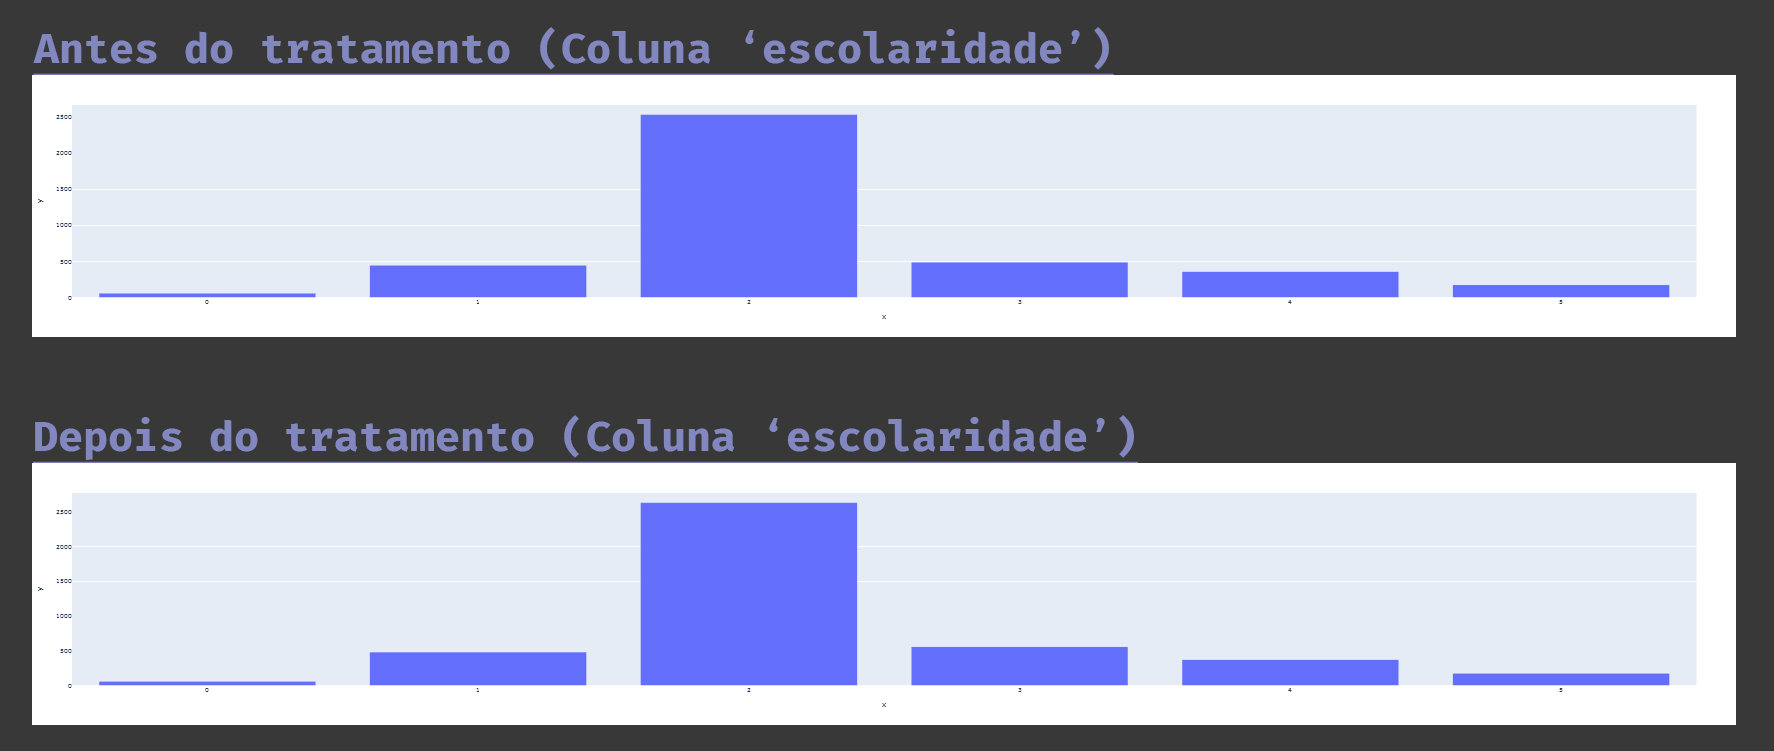

### Limpeza da tabela "Peso e altura"

#### Remoção e renomeação de colunas

Incialmente são retiradas todas as colunas que possuem um número desconsiderável de dados ou que contém dados irrelevantes para a confecção do modelo.

In [99]:
df_pesoEaltura = df_pesoEaltura.drop([
  'Repeat Instance',
  'Repeat Instrument'
], axis=1)

O nome das colunas foi alterado para efeitos de praticidade.

In [100]:
df_pesoEaltura = df_pesoEaltura.rename(columns={
  "Record ID": "record_id",
  "Data: ": "data",
  "Peso": "peso",
  "Altura (em centimetros)": "altura"
})

#### Lidando com dados ruidosos ou ausentes

A estratégia utilizada para a limpeza de dados ausentes, no caso desse *data frame* se deu de uma forma diferente. Por mais que a distribuição normal também tenha sido utilizada para a substituição de valores 'NaN', a abordagem de interpretar a tabela foi modificada pela equipe. 

Sabendo da importância da diferença entre os pesos dos pacientes para avaliar se o tipo de tratamento foi adequado, apenas a primeira e a última instância de peso e altura foram aproveitadas, para que assim, fosse possível estimar a diferença de peso antes e depois do tratamento.

Sabendo essa diferença, foi-se calculado então o coeficiente angular de uma reta de peso e do IMC em função do tempo de cada paciente, tornando possível a descoberta  da taxa de redução ou aumento de peso no período anterior e posterior ao tratamento.

In [101]:
"""
df_pesoEaltura_novo = pd.DataFrame(columns=['ID', 'peso_0', 'peso_i'])

def primeiro_ultimo(df, out_df, col):
  
  grupos = df[['ID', col]].groupby('ID')
  

  for id, grupo in grupos:
    try:
      out_df[['ID', f"{col}_0"]] = out_df[['ID', f"{col}_0"]].append(grupo.dropna().iloc[0][['ID', col]].rename({str(col): f"{col}_0"}))
      out_df[['ID', f"{col}_i"]] = out_df[['ID', f"{col}_0"]].append(grupo.dropna().iloc[-1][['ID', col]].rename({str(col): f"{col}_i"}))

    except IndexError:
      pass
      
  
primeiro_ultimo(df_pesoEaltura, df_pesoEaltura_novo, 'peso')
df_pesoEaltura_novo
"""

'\ndf_pesoEaltura_novo = pd.DataFrame(columns=[\'ID\', \'peso_0\', \'peso_i\'])\n\ndef primeiro_ultimo(df, out_df, col):\n  \n  grupos = df[[\'ID\', col]].groupby(\'ID\')\n  \n\n  for id, grupo in grupos:\n    try:\n      out_df[[\'ID\', f"{col}_0"]] = out_df[[\'ID\', f"{col}_0"]].append(grupo.dropna().iloc[0][[\'ID\', col]].rename({str(col): f"{col}_0"}))\n      out_df[[\'ID\', f"{col}_i"]] = out_df[[\'ID\', f"{col}_0"]].append(grupo.dropna().iloc[-1][[\'ID\', col]].rename({str(col): f"{col}_i"}))\n\n    except IndexError:\n      pass\n      \n  \nprimeiro_ultimo(df_pesoEaltura, df_pesoEaltura_novo, \'peso\')\ndf_pesoEaltura_novo\n'

In [102]:
lista_RecorId = df_pesoEaltura['record_id'].unique()
df_novo = pd.DataFrame()

# Seleção de primeira e ultima instância de cada ID
for i in lista_RecorId: 
    df_query = df_pesoEaltura.query(f'record_id == {i}')
    df_query = df_query.sort_values(by='data')

    df_row_first = df_query.iloc[0]

    if len(df_query) > 1: 
      df_row_second = df_query.iloc[1]

      numero = len(df_query) - 1
  
      for col in ['altura', 'peso', 'IMC']:
        while (not pd.isna(df_row_second[col].all())) and (not pd.isna(df_row_second['data'])) and (numero > 1):
          df_row_second = df_query.iloc[len(df_query) - numero]
          numero -= 1
      
      # Criação de novas colunas com última instância
      df_row_first['ultimo_peso'] = df_row_second['peso']
      df_row_first['ultima_altura'] = df_row_second['altura']
      df_row_first['ultimo_IMC'] = df_row_second['IMC']
      df_row_first['ultima_data'] = df_row_second['data']
      
      df_novo = df_novo.append(df_row_first, ignore_index=True)
      
    else: 
      df_novo = df_novo.append(df_row_first, ignore_index=True)

# Renomeia colunas de primeira instância
df_novo = df_novo.rename(columns={
                        "peso": "primeiro_peso", 
                        "altura": "primeira_altura",
                        "IMC": "primeiro_IMC"
                        })

df_pesoEaltura = df_novo

/usr/local/lib/python3.8/dist-packages/pandas/core/series.py:1056: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1724: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [103]:
np.random.seed(73)

# Calcula IMC
df_pesoEaltura['primeiro_IMC'] = (df_pesoEaltura['primeiro_peso'] / pow(df_pesoEaltura['primeira_altura']/100, 2))

lista_pesoEaltura = ["primeiro_peso", "primeira_altura", "ultimo_peso", "ultima_altura", "primeiro_IMC"]
lista_normal = []

# Substitui dados nulos com valores aleatórios seguindo a distribuição normal
for i in lista_pesoEaltura: 
  df_pesoEaltura[i] = df_pesoEaltura[i].fillna(pd.Series(np.random.normal(df_pesoEaltura[i].std(skipna=True), 
                                                                          df_pesoEaltura[i].std(skipna=True), 
                                                                          df_pesoEaltura[i].isnull().sum()), 
                                                         index=df_pesoEaltura[i].index[df_pesoEaltura[i].isnull()]))

df_pesoEaltura['ultimo_IMC'] = (df_pesoEaltura['ultimo_peso'] / pow(df_pesoEaltura['ultima_altura']/100, 2))

df_pesoEaltura

,record_id,data,primeiro_peso,primeira_altura,primeiro_IMC,ultimo_peso,ultima_altura,ultimo_IMC,ultima_data
0,302.0,2009-01-02,57.80,158.0,23.153341,64.900000,158.0,25.997436,2013-05-23
1,710.0,2008-07-12,61.00,156.0,25.065746,63.800000,155.0,26.555671,2020-10-31
2,752.0,2009-12-03,84.00,152.0,36.357341,85.900000,152.0,37.179709,2013-11-27
3,1367.0,2010-04-28,57.90,143.0,28.314343,51.000000,143.0,24.940095,2011-07-27
4,1589.0,2009-04-03,63.20,167.0,22.661264,63.650000,167.0,22.822618,2013-09-05
...,...,...,...,...,...,...,...,...,...
4267,82123.0,2021-02-07,85.40,153.0,36.481695,24.018708,154.0,10.127639,2021-10-25
4268,82124.0,2020-11-10,81.10,151.0,35.568615,78.000000,151.0,34.209026,2020-12-05
4269,82131.0,2020-11-01,71.40,156.5,29.152079,75.650000,156.0,31.085634,2021-01-04
4270,82205.0,2021-02-28,135.85,174.0,44.870525,23.936242,174.0,7.906012,2021-08-24


In [104]:
# Reformatação de colunas para expressar taxas de variação
df_pesoEaltura['diferenca_peso'] = df_pesoEaltura['ultimo_peso'] - df_pesoEaltura['primeiro_peso']
df_pesoEaltura['coef_peso'] = df_pesoEaltura['ultimo_peso'] / df_pesoEaltura['primeiro_peso']

df_pesoEaltura['ultima_data'] = pd.to_datetime(df_pesoEaltura['ultima_data'])
df_pesoEaltura['data'] = pd.to_datetime(df_pesoEaltura['data'])

df_pesoEaltura['diferenca_altura'] = df_pesoEaltura['ultima_data'] - df_pesoEaltura['data']

df_pesoEaltura['diferenca_tempo'] = (df_pesoEaltura['ultima_data'] - df_pesoEaltura['data']).dt.days
df_pesoEaltura['coef_peso_tempo'] = df_pesoEaltura['diferenca_peso'] / df_pesoEaltura['diferenca_tempo']

df_pesoEaltura['data'] = df_pesoEaltura['data'].fillna(0)
df_pesoEaltura['ultima_data'] = df_pesoEaltura['ultima_data'].fillna(0)
df_pesoEaltura['diferenca_altura'] = df_pesoEaltura['diferenca_altura'].fillna(pd.Timedelta(0))

df_pesoEaltura['diferenca_tempo'] = df_pesoEaltura['diferenca_tempo'].fillna(0)
df_pesoEaltura['coef_peso_tempo'] = df_pesoEaltura['coef_peso_tempo'].fillna(0)

### Limpeza da tabela "Dados histopatológicos"

#### Remoção e renomeação de colunas



Incialmente são retiradas todas as colunas que possuem um número desconsiderável de dados ou que contém dados irrelevantes para a confecção do modelo.

In [105]:
df_histopatologia = df_histopatologia.rename(columns={"Record ID": "record_id"})

lista_RecorId = df_histopatologia['record_id'].unique()

df_novo_histopatologia = df_histopatologia 
df_novo = pd.DataFrame(columns= df_histopatologia.columns)

In [106]:
for i in lista_RecorId:
    df_query = df_histopatologia.query(f'record_id == {i}')
    idx_linha_max = df_query.apply(lambda x: x.count(), axis=1).idxmax()
    linha_max = df_query.loc[idx_linha_max]
    df_novo = df_novo.append(linha_max, ignore_index=True)

df_histopatologia = df_novo

df_histopatologia

,record_id,Repeat Instrument,Repeat Instance,Diagnostico primario (tipo histológico),Grau histológico,Subtipo tumoral,Receptor de estrogênio,Receptor de progesterona,Ki67 (>14%),Receptor de progesterona (quantificação %),Receptorde Estrogênio (quantificação %),Indice H (Receptorde progesterona),HER2 por IHC,HER2 por FISH,Ki67 (%)
0,302,Dados Histopatologicos Mama,1.0,NaN,NaN,5.0,positivo,positivo,NaN,NaN,NaN,NaN,+++ (positivo),NaN,NaN
1,710,Dados Histopatologicos Mama,1.0,NaN,NaN,2.0,positivo,negativo,positivo,NaN,NaN,NaN,0 (negativo),NaN,20.0
2,752,Dados Histopatologicos Mama,1.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,+++ (positivo),NaN,NaN
3,1367,Dados Histopatologicos Mama,1.0,NaN,NaN,2.0,positivo,positivo,positivo,5,60,10.0,0 (negativo),NaN,40.0
4,1589,Dados Histopatologicos Mama,1.0,NÃO-ESPECIAL - Carcinoma de mama ductal invasi...,NaN,5.0,positivo,positivo,NaN,NaN,NaN,NaN,+++ (positivo),NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4267,82123,Dados Histopatologicos Mama,1.0,NaN,NaN,3.0,NaN,NaN,positivo,NaN,NaN,NaN,+++ (positivo),NaN,20.0
4268,82124,Dados Histopatologicos Mama,1.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,+++ (positivo),NaN,NaN
4269,82131,Dados Histopatologicos Mama,1.0,NaN,NaN,3.0,NaN,NaN,positivo,NaN,NaN,NaN,+++ (positivo),NaN,50.0
4270,82205,Dados Histopatologicos Mama,1.0,NaN,NaN,4.0,negativo,negativo,positivo,NaN,NaN,NaN,0 (negativo),NaN,90.0


In [107]:
df_histopatologia = df_histopatologia.rename(columns={
                        "Grau histológico": "grau_histologico", 
                        "Subtipo tumoral": "subtipo_tumoral",
                        "Receptor de estrogênio": "receptor_estrogenio",
                        "Receptor de progesterona": "receptor_progesterona",
                        "Ki67 (>14%)": "ki67",
                        "HER2 por IHC": "her2_ihc",
                        "Diagnostico primario (tipo histológico)": "primeiro_diagnostico",
                        "HER2 por FISH": "her2_fish"
                        })

O nome das colunas foi alterado para efeitos de praticidade.

In [108]:
df_histopatologia = df_histopatologia.rename(columns={
    "Record ID": "record_id",
    "Grau histológico": "grau_histologico", 
    "Subtipo tumoral": "subtipo_tumoral",
    "Receptor de estrogênio": "receptor_estrogenio",
    "Receptor de progesterona": "receptor_progesterona",
    "Ki67 (>14%)": "ki67",
    "HER2 por IHC": "her2_ihc",
    "Diagnostico primario (tipo histológico)": "primeiro_diagnostico",
    "HER2 por FISH": "her2_fish"
})

#### Data labeling

In [109]:
lista_replace = [["primeiro_diagnostico",
                  "NÃO-ESPECIAL - Carcinoma de mama ductal invasivo (CDI)/SOE", "Carcinoma de mama lobular invasivo",
                    "outros", "Carcinoma de mama metaplasico", "Carcinoma de mama mucinoso", "Carcinoma de mama papilifero",
                    "Carcinoma de mama medular", "Carcinoma de mama misto (ductal e lobular) invasivo", 
                    "Carcinoma de mama cistico adenoide", "Carcinoma mamário invasivo multifocal",
                    "Carcinoma de mama misto (ductal e micropapilífero) invasivo", "CARCINOMA MAMÁRIO INVASIVO DO TIPO APÓCRINO",
                    "Carcinoma de mama lobular in situ", "Carcinoma lobular pleomórfico", "Adenomioepitelioma maligno",
                    "Carcinoma de mama tubular", "Tumor PHYLLODES maligno", "Carcinoma de mama micropapilar"],
                 ["receptor_estrogenio", 
                  "positivo", "negativo", "não realizado"], 
                 ["receptor_progesterona",
                  "positivo", "negativo", "inconclusivo", "não realizado"],
                 ["ki67",
                  "positivo","negativo","inconclusivo","não realizado"],
                 ["her2_ihc",
                  " +++ (positivo)"," ++ (duvidoso)"," + (negativo)","indeterminado", "0 (negativo)"],
                 ["her2_fish",
                  "não realizado", "amplificado", "sem amplificação", "duvidoso", "reação não funcionou"],
                 
                 ['Receptorde Estrogênio (quantificação %)',
                  "neg","NEG","1-10"],
                 ['Receptor de progesterona (quantificação %)',
                  'neg','NEG','70%','inconclusivo','20-70']
                 ]

for i in range(0, len(lista_replace)):
  for j in range(1, len(lista_replace[i])):
    df_histopatologia[lista_replace[i][0]].replace(lista_replace[i][j], j-1, inplace=True)

df_histopatologia = df_histopatologia.drop('Receptorde Estrogênio (quantificação %)', axis=1)
df_histopatologia = df_histopatologia.drop('Receptor de progesterona (quantificação %)', axis=1)

#### Lidando com dados ruidosos ou ausentes

In [110]:
np.random.seed(73)

lista = [
    ["primeiro_diagnostico", 0, 17], 
    ["grau_histologico"], ["subtipo_tumoral", 0 , 5] , ["receptor_estrogenio", 0, 2],
    ["receptor_progesterona", 0 , 3], ["Ki67 (%)", 0 , 3],["her2_ihc", 0 , 4],
    ["her2_fish", 0, 4], 
    ['Indice H (Receptorde progesterona)']
         ]

lista_normal = []

for i in range(0, len(lista)): 
  lista_normal.append(np.random.normal(df_histopatologia[lista[i][0]].mean(skipna=True), 
                                       df_histopatologia[lista[i][0]].std(skipna=True), 
                                       df_histopatologia[f'{lista[i][0]}'].isnull().sum()))

  for j in range(0, len(lista_normal[i])):
    lista_normal[i][j] = round(lista_normal[i][j])

    if len(lista[i]) >= 2 : 
      if lista_normal[i][j] > lista[i][2]: 
        lista_normal[i][j] = lista[i][2]
      if lista_normal[i][j] < lista[i][1]: 
        lista_normal[i][j] = lista[i][1]

for i in range(0, len(lista)):
  df_histopatologia[f'{lista[i][0]}'] = df_histopatologia[f'{lista[i][0]}'].fillna(pd.Series(lista_normal[i], index=df_histopatologia[f'{lista[i][0]}'].index[df_histopatologia[f'{lista[i][0]}'].isnull()]))

df_histopatologia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4272 entries, 0 to 4271
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   record_id                           4272 non-null   object 
 1   Repeat Instrument                   4272 non-null   object 
 2   Repeat Instance                     4272 non-null   float64
 3   primeiro_diagnostico                4272 non-null   float64
 4   grau_histologico                    4272 non-null   float64
 5   subtipo_tumoral                     4272 non-null   float64
 6   receptor_estrogenio                 4272 non-null   float64
 7   receptor_progesterona               4272 non-null   float64
 8   ki67                                3524 non-null   float64
 9   Indice H (Receptorde progesterona)  4272 non-null   float64
 10  her2_ihc                            4272 non-null   float64
 11  her2_fish                           4272 no

### Limpeza da tabela "Registo de tumores"

#### Remoção e renomeação de colunas

In [111]:
df_registro_tumo = df_registro_tumo.drop(['Repeat Instrument', 
                                        'Repeat Instance',
                                        'Data do tratamento',
                                        'Data de Recidiva'
                                        ], axis=1)

In [112]:
df_registro_tumo = df_registro_tumo.rename(columns={
                        "Record ID" : "record_id",
                        "Código da Topografia (CID-O)": "cid_o", 
                        "Código da Morfologia de acordo com o CID-O": "morfologia_cid_o",
                        "Estadio Clínico  ": "estadio_clinico",
                        "Grupo de Estadio Clínico": "grupo_estadio_clinico",
                        "Metastase ao DIAGNOSTICO - CID-O #4 ": "metastase_cido4",
                        "Classificação TNM Clínico - M": "classificacao_tnm_m",
                        "Classificação TNM Clínico - N": "classificacao_tnm_n",
                        "Classificação TNM Patológico - N": "classificacao_tnm_n_patologico",
                        "Classificação TNM Patológico - T": "classificacao_tnm_t_patologico",
                        "Com recidiva à distância": "recidiva_distancia",
                        "Com recidiva regional": "recidiva_regional",
                        "Com recidiva local": "recidiva_local",
                        "Combinação dos Tratamentos Realizados no Hospital": "combinacao_tratamentos",
                        "Lateralidade do tumor": "lateralidade_tumor",
                        "Tempo desde o diagnóstico até a primeira recidiva  ": "tempo_diagnostico",
                        "Descrição da Morfologia de acordo com o CID-O  (CID-O - 3ª edição)": "descricao_morfologia",
                        "Descrição da Topografia ": "descricao_topografia",
                        "Metastase ao DIAGNOSTICO - CID-O #1": "metastase_cid1",
                        "Metastase ao DIAGNOSTICO - CID-O #2": "metastase_cid2",
                        "Metastase ao DIAGNOSTICO - CID-O #3": "metastase_cid3",
                        "Metastase ao DIAGNOSTICO - CID-O #4": "metastase_cid4",
                        })

#### Data labeling

In [113]:
lista_replace = [["grupo_estadio_clinico",
                  "0", "I", "II", "III", "III", "IV", "Y: Na", "X - nao foi possivel determinar"],
                 ["lateralidade_tumor", 
                  "Esquerda", "Direita", "não se aplica", "Bilateral"], 
                 ["combinacao_tratamentos",
                  "Cirurgia + Radio + Quimio + Hormonio", "Cirurgia + Quimioterapia",
                    "Outras combinações", "Cirurgia + Radio + Quimio", "Cirurgia + Radioterapia",
                    "Quimioterapia", "Radioterapia + Quimioterapia", "Nenhum tratamento", "Radioterapia",
                    "Cirurgia"],
                 ["classificacao_tnm_m",
                  "0", "1", "Y: Na", "X - nao foi possivel determinar", "1B", "1A"],
                 ["classificacao_tnm_n",
                  "0","1","2","3","1A","2A","3A","1B","2B","3B","3C","X - nao foi possivel determinar",
                  "Y: Na"],
                 ["classificacao_tnm_t_patologico",
                  "2","1C","3","1","1B","4B","IV","IS","4D","1MIC","Y: Na","2C","1A","4A","4C"],
                 ["classificacao_tnm_n_patologico",
                  "0", "1", "2", "3", "2A", "3A", "3B", "3C", "Y: Na", "X - nao foi possivel determinar","9", "10", "11"],
                 ["recidiva_distancia",
                  "Não", "Sim"],
                 ["recidiva_regional",
                 "Não", "Sim"],
                 ["recidiva_local",
                  "Não", "Sim"],
                 ['metastase_cid1',
                  'C41 - Ossos e Das Cartilagens Articulares de Outras Localizações',
                 'C34 - Bronquios e Pulmoes',
                 'C22 - Fígado e Das Vias Biliares Intra-hepáticas',
                 'C77 - Secundária e Não Especificada Dos Gânglios Linfáticos',
                 'C71 - Encefalo',
                  'C40 - Ossos e Cartilagens Articulares Dos Membros',
                 'C49 - Tecido Conjuntivo e de Outros Tecidos Moles',
                 'C38 - Coração, Mediastino e Pleura,',
                  'C56 - Ovario',
                  'C15 - Esofago',
                 'C44 - Pele nao-melanoma',
                 'C48 - Tecidos Moles do Retroperitônio e do Peritônio',
                 'C74 - Glândula Supra-renal (Glândula Adrenal)',
                 'C42 - Sistema hematopoiético e reticuloendotelial',
                  'C18 - Colon,',
                 'C67 - Bexiga'],
                 ['metastase_cid2', 
                  'C22 - Fígado e Das Vias Biliares Intra-hepáticas',
                  'C77 - Secundária e Não Especificada Dos Gânglios Linfáticos',
                  'C34 - Bronquios e Pulmoes',
                  'C40 - Ossos e Cartilagens Articulares Dos Membros',
                  'C71 - Encefalo',
                  'C50 - Mama',
                  'C38 - Coração, Mediastino e Pleura,',
                  'C41 - Ossos e Das Cartilagens Articulares de Outras Localizações',
                  'C74 - Glândula Supra-renal (Glândula Adrenal)',
                  'C49 - Tecido Conjuntivo e de Outros Tecidos Moles',
                  'C44 - Pele nao-melanoma',
                  'C75 - Outras Glândulas Endócrinas e de Estruturas Relacionadas',
                  'C48 - Tecidos Moles do Retroperitônio e do Peritônio',
                  'C70 - Meninges',
                  'C25 - Pancreas',
                  'C07 - Glandula Parotida',
                  'C56 - Ovario'],
                 ['metastase_cid3' ,
                  'C77 - Secundária e Não Especificada Dos Gânglios Linfáticos',
                  'C64 - Rim, Exceto Pelve Renal',
                  'C22 - Fígado e Das Vias Biliares Intra-hepáticas',
                  'C71 - Encefalo',
                  'C48 - Tecidos Moles do Retroperitônio e do Peritônio',
                  'C38 - Coração, Mediastino e Pleura,',
                  'C34 - Bronquios e Pulmoes',
                  'C41 - Ossos e Das Cartilagens Articulares de Outras Localizações',
                  'C40 - Ossos e Cartilagens Articulares Dos Membros',
                  'C49 - Tecido Conjuntivo e de Outros Tecidos Moles',
                  'C16 - Estomago',
                  'C42 - Sistema hematopoiético e reticuloendotelial',
                  'C74 - Glândula Supra-renal (Glândula Adrenal)',
                  'C25 - Pancreas'],
                 ['metastase_cid4',
                  'C38 - Coração, Mediastino e Pleura,',
                  'C22 - Fígado e Das Vias Biliares Intra-hepáticas',
                  'C77 - Secundária e Não Especificada Dos Gânglios Linfáticos',
                  'C48 - Tecidos Moles do Retroperitônio e do Peritônio',
                  'C75 - Outras Glândulas Endócrinas e de Estruturas Relacionadas',
                  'C41 - Ossos e Das Cartilagens Articulares de Outras Localizações',
                  'C56 - Ovario',
                  'C34 - Bronquios e Pulmoes',
                  'C49 - Tecido Conjuntivo e de Outros Tecidos Moles',
                  'C40 - Ossos e Cartilagens Articulares Dos Membros',
                  'C71 - Encefalo',
                  'C67 - Bexiga',
                  'C74 - Glândula Supra-renal (Glândula Adrenal)']
                 ]
                 
for i in range(0, len(lista_replace)):
  for j in range(1, len(lista_replace[i])):
    df_registro_tumo[lista_replace[i][0]].replace(lista_replace[i][j], j-1, inplace=True)

#### Lidando com dados ruidosos ou ausentes

In [114]:
lista_RecorId = df_registro_tumo['record_id'].unique()

df_novo_histopatologia = df_registro_tumo 
df_novo = pd.DataFrame(columns= df_registro_tumo.columns)

for i in lista_RecorId:
    df_query = df_registro_tumo.query(f'record_id == {i}')
    idx_linha_max = df_query.apply(lambda x: x.count(), axis=1).idxmax()
    linha_max = df_query.loc[idx_linha_max]
    df_novo = df_novo.append(linha_max, ignore_index=True)

df_registro_tumo = df_novo

In [116]:
df_registro_tumo = df_registro_tumo[['record_id', 'Data da primeira consulta institucional [dt_pci]',
       'Data do diagnóstico', 'cid_o', 'morfologia_cid_o', 'estadio_clinico',
       'grupo_estadio_clinico', 'Classificação TNM Clínico - T',
       'classificacao_tnm_n', 'classificacao_tnm_m', 'metastase_cid1',
       'metastase_cid2', 'metastase_cid3', 'metastase_cid4',
       'combinacao_tratamentos', 'Ano do diagnóstico', 'lateralidade_tumor',
       'tempo_diagnostico','descricao_morfologia', 'descricao_topografia',
       'classificacao_tnm_n_patologico', 'classificacao_tnm_t_patologico',
       'recidiva_distancia', 'recidiva_regional', 'recidiva_local']]

Os dados nulos das colunas categóricas serão sobrepostos com valores decididos de forma aleatória dentro de um intervalo da distribuição normal para evitar a presença de *outliers*

In [118]:
np.random.seed(73)

lista = [['grupo_estadio_clinico'],['metastase_cid1'],['metastase_cid2'],['metastase_cid3'],['metastase_cid4'],['tempo_diagnostico'],['classificacao_tnm_n_patologico'],['classificacao_tnm_t_patologico'],
    ["combinacao_tratamentos",0, 22], ["tempo_diagnostico", 0 , 22] , ["classificacao_tnm_m", 0, 5],
    ["classificacao_tnm_n", 0 , 3], ["morfologia_cid_o", 0 , 22],["classificacao_tnm_n_patologico", 0 , 22],
    ["classificacao_tnm_t_patologico", 0, 22], ["grupo_estadio_clinico"], ["recidiva_distancia", 0 , 1], ["recidiva_regional"], ["recidiva_local", 0, 1]
         ]

lista_normal = []

for i in range(0, len(lista)):
  lista_normal.append(np.random.normal(df_registro_tumo[lista[i][0]].mean(skipna=True),
                                      df_registro_tumo[lista[i][0]].std(skipna=True),
                                      df_registro_tumo[f'{lista[i][0]}'].isnull().sum()))
  for j in range(0, len(lista_normal[i])):
    lista_normal[i][j] = round(lista_normal[i][j])

    if len(lista[i]) >= 2 : 
      if lista_normal[i][j] > lista[i][2]: 
        lista_normal[i][j] = lista[i][2]
      if lista_normal[i][j] < lista[i][1]: 
        lista_normal[i][j] = lista[i][1]

null_cid_o = df_registro_tumo.cid_o.isnull().sum()
lista_normal_cid_o = []

null_descricao_topografia = df_registro_tumo.descricao_topografia.isnull().sum()
lista_normal_descricao_topografia = []

null_descricao_morfologia = df_registro_tumo.descricao_morfologia.isnull().sum()
lista_normal_descricao_morfologia = []

for i in range(0, null_cid_o):
  lista_normal_cid_o.append("C509")

for i in range(0, null_descricao_morfologia): 
  lista_normal_descricao_morfologia.append("CARCINOMA DUCTAL INFILTRANTE SOE")

for i in range(0, null_descricao_topografia): 
  lista_normal_descricao_topografia.append("MAMA SOE (EXCLUI PELE DA MAMA C44.5)")

for i in range(0, len(lista)):
  df_registro_tumo[f'{lista[i][0]}'] = df_registro_tumo[f'{lista[i][0]}'].fillna(pd.Series(lista_normal[i], index=df_registro_tumo[f'{lista[i][0]}'].index[df_registro_tumo[f'{lista[i][0]}'].isnull()]))

df_registro_tumo

,record_id,Data da primeira consulta institucional [dt_pci],Data do diagnóstico,cid_o,morfologia_cid_o,estadio_clinico,grupo_estadio_clinico,Classificação TNM Clínico - T,classificacao_tnm_n,classificacao_tnm_m,...,Ano do diagnóstico,lateralidade_tumor,tempo_diagnostico,descricao_morfologia,descricao_topografia,classificacao_tnm_n_patologico,classificacao_tnm_t_patologico,recidiva_distancia,recidiva_regional,recidiva_local
0,302,2008-03-22,2008-03-23,C504,85003.0,IIA,2.0,2,0.0,0.0,...,2008.0,0.0,476.0,CARCINOMA DUCTAL INFILTRANTE SOE,MAMA QUADRANTE SUPERIOR EXTERNO DA,2.0,0.0,0.0,0.0,0.0
1,710,2006-11-11,2007-11-11,C508,85003.0,IIIA,3.0,3,1.0,0.0,...,2008.0,0.0,2442.0,CARCINOMA DUCTAL INFILTRANTE SOE,MAMA LESAO SOBREPOSTA DA,0.0,-3.0,0.0,1.0,1.0
2,752,2007-09-25,2007-12-18,C509,84803.0,IIA,2.0,2,0.0,0.0,...,2008.0,0.0,473.0,ADENOCARCINOMA MUCINOSO,MAMA SOE (EXCLUI PELE DA MAMA C44.5),9.0,0.0,0.0,0.0,0.0
3,1367,2008-02-03,2008-02-06,C505,85003.0,IIA,2.0,1,1.0,0.0,...,2008.0,0.0,890.0,CARCINOMA DUCTAL INFILTRANTE SOE,MAMA QUADRANTE INFERIOR EXTERNO DA,1.0,12.0,0.0,1.0,0.0
4,1589,2008-05-15,2008-05-21,C508,85003.0,IIB,2.0,2,1.0,0.0,...,2008.0,1.0,1223.0,CARCINOMA DUCTAL INFILTRANTE SOE,MAMA LESAO SOBREPOSTA DA,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4267,82123,2020-12-04,2020-10-10,C504,85003.0,IIB,3.0,3,0.0,0.0,...,2020.0,1.0,654.0,CARCINOMA DUCTAL INFILTRANTE SOE,MAMA QUADRANTE SUPERIOR EXTERNO DA,2.0,8.0,0.0,0.0,0.0
4268,82124,2020-06-20,2020-09-05,C509,85203.0,IV,2.0,4D,1.0,1.0,...,2020.0,0.0,582.0,CARCINOMA LOBULAR SOE,MAMA SOE (EXCLUI PELE DA MAMA C44.5),0.0,-6.0,0.0,0.0,0.0
4269,82131,2020-11-01,2019-12-23,C502,85203.0,IIIA,4.0,3,1.0,0.0,...,2020.0,1.0,14.0,CARCINOMA LOBULAR SOE,MAMA QUADRANTE SUPERIOR INTERNO DA,-2.0,5.0,0.0,0.0,0.0
4270,82205,2021-02-28,2020-11-07,C504,85003.0,IV,2.0,4D,1.0,1.0,...,2020.0,0.0,1151.0,CARCINOMA DUCTAL INFILTRANTE SOE,MAMA QUADRANTE SUPERIOR EXTERNO DA,3.0,2.0,0.0,0.0,1.0


## Merge em tabela única

In [119]:
merged_df = pd.merge(df_demograficos, df_histopatologia, on='record_id', how='inner')
merged_df = pd.merge(merged_df, df_registro_tumo, on='record_id', how='inner')
merged_df = pd.merge(merged_df, df_pesoEaltura, on='record_id', how='inner')

In [120]:
merged_df

,record_id,escolaridade,idade_diagnostico,sexo,raca,ultima_informacao_paciente,tempo_seguimento,ja_gravida,gestacao_idade,tempo_amamentacao,...,primeiro_IMC,ultimo_peso,ultima_altura,ultimo_IMC,ultima_data,diferenca_peso,coef_peso,diferenca_altura,diferenca_tempo,coef_peso_tempo
0,302,1.0,51.000000,0.0,1.0,0.0,2225.0,1.0,19.865652,35.937008,...,23.153341,64.900000,158.0,25.997436,2013-05-23 00:00:00,7.100000,1.122837,1602 days,1602.0,0.004432
1,710,3.0,58.000000,0.0,1.0,3.0,3294.0,1.0,19.865652,35.937008,...,25.065746,63.800000,155.0,26.555671,2020-10-31 00:00:00,2.800000,1.045902,4494 days,4494.0,0.000623
2,752,1.0,56.000000,0.0,1.0,3.0,4153.0,1.0,19.865652,35.937008,...,36.357341,85.900000,152.0,37.179709,2013-11-27 00:00:00,1.900000,1.022619,1455 days,1455.0,0.001306
3,1367,1.0,63.000000,0.0,1.0,0.0,1331.0,1.0,19.865652,35.937008,...,28.314343,51.000000,143.0,24.940095,2011-07-27 00:00:00,-6.900000,0.880829,455 days,455.0,-0.015165
4,1589,2.0,42.000000,0.0,1.0,3.0,3290.0,1.0,19.865652,35.937008,...,22.661264,63.650000,167.0,22.822618,2013-09-05 00:00:00,0.450000,1.007120,1616 days,1616.0,0.000278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4172,82123,3.0,62.039299,0.0,1.0,3.0,380.0,1.0,19.865652,35.937008,...,36.481695,24.018708,154.0,10.127639,2021-10-25 00:00:00,-61.381292,0.281250,260 days,260.0,-0.236082
4173,82124,3.0,41.000000,0.0,1.0,0.0,138.0,1.0,27.000000,24.000000,...,35.568615,78.000000,151.0,34.209026,2020-12-05 00:00:00,-3.100000,0.961776,25 days,25.0,-0.124000
4174,82131,3.0,59.000000,0.0,1.0,0.0,900.0,1.0,26.000000,7.000000,...,29.152079,75.650000,156.0,31.085634,2021-01-04 00:00:00,4.250000,1.059524,64 days,64.0,0.066406
4175,82205,3.0,29.000000,0.0,1.0,0.0,538.0,1.0,19.865652,35.937008,...,44.870525,23.936242,174.0,7.906012,2021-08-24 00:00:00,-111.913758,0.176196,177 days,177.0,-0.632281


### Resumo das colunas

| Dados Demográficos                         	| Dados Histopatológicos   	| Dados de Peso e Altura 	| Dados de Registro de Turno                         	|
|--------------------------------------------	|--------------------------	|------------------------	|----------------------------------------------------	|
| 'escolaridade'                             	| 'anti_her2_neoadjuvante' 	| 'data'                 	| 'Receptor de progesterona (quantificação %)'       	|
| 'idade_diagnostico'                        	| 'Repeat Instrument'      	| 'primeiro_peso'        	| 'Receptorde Estrogênio (quantificação %)'          	|
| 'sexo'                                     	| 'Repeat Instance'        	| 'primeira_altura'      	| 'Indice H (Receptorde progesterona)'               	|
| 'raca'                                     	| 'primeiro_diagnostico'   	| 'primeiro_IMC'         	| 'her2_ihc'                                         	|
| 'ultima_informacao_paciente'               	| 'grau_histologico'       	| 'ultimo_peso'          	| 'her2_fish'                                        	|
| 'tempo_seguimento'                         	| 'subtipo_tumoral'        	| 'ultima_altura'        	| 'Ki67 (%)'                                         	|
| 'ja_gravida'                               	| 'receptor_estrogenio'    	| 'ultimo_IMC'           	| 'Data da primeira consulta institucional [dt_pci]' 	|
| 'gestacao_idade'                           	| 'receptor_progesterona'  	| 'ultima_data'          	| 'Data do diagnóstico' 'cid_o' 'morfologia_cid_o'   	|
| 'tempo_amamentacao'                        	| 'ki67'                   	| 'diferenca_peso'       	| 'estadio_clinico'                                  	|
| 'grau_parentesco_mama_primeiro_1_vez'      	|                          	| 'coef_peso'            	| 'grupo_estadio_clinico'                            	|
| 'grau_parentesco_mama_primeiro_mais_vezes' 	|                          	| 'diferenca_altura'     	| 'Classificação TNM Clínico - T'                    	|
| 'grau_parentesco_mama_segundo_1_vez'       	|                          	| 'diferenca_tempo'      	| 'classificacao_tnm_n'                              	|
| 'grau_parentesco_mama_segundo_mais_vezes'  	|                          	| 'coef_peso_tempo'      	| 'classificacao_tnm_m'                              	|
| 'idade_primeira_menstruacao'               	|                          	| 'idade_faixa'          	| 'metastase_cid1'                                   	|
| 'uso_anticoncepcional'                     	|                          	|                        	| 'metastase_cid2'                                   	|
| 'atividade_fisica'                         	|                          	|                        	| 'metastase_cid3'                                   	|
| 'consumo_alcool'                           	|                          	|                        	| 'metastase_cid4'                                   	|
| 'historico_cancer'                         	|                          	|                        	| 'combinacao_tratamentos'                           	|
| 'grau_parentesco_primeiro'                 	|                          	|                        	| 'Ano do diagnóstico'                               	|
| 'grau_parentesco_segundo'                  	|                          	|                        	| 'lateralidade_tumor'                               	|
| 'grau_parentesco_terceiro'                 	|                          	|                        	| 'tempo_diagnostico'                                	|
| 'tratamento'                               	|                          	|                        	| 'descricao_morfologia'                             	|
|                                            	|                          	|                        	| 'descricao_topografia'                             	|
|                                            	|                          	|                        	| 'classificacao_tnm_n_patologico'                   	|
|                                            	|                          	|                        	| 'classificacao_tnm_t_patologico'                   	|
|                                            	|                          	|                        	| 'recidiva_distancia'                               	|
|                                            	|                          	|                        	| 'recidiva_regional'                                	|
|                                            	|                          	|                        	| 'recidiva_local'                                   	|

## Formulação e teste de hipóteses

In [121]:
df_demograficos_chi2 = df_demograficos[['escolaridade','idade_diagnostico','sexo','raca','ultima_informacao_paciente','tempo_seguimento','ja_gravida','gestacao_idade','tempo_amamentacao'
,'idade_primeira_menstruacao','consumo_alcool','historico_cancer','grau_parentesco_primeiro','grau_parentesco_segundo','grau_parentesco_terceiro',
'tratamento','anti_her2_neoadjuvante']]

!pip install dython
!pip uninstall numpy && pip install numpy==1.24 
!pip install seaborn==0.12.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Found existing installation: numpy 1.24.0
Uninstalling numpy-1.24.0:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.8
    /usr/local/lib/python3.8/dist-packages/numpy-1.24.0.dist-info/*
    /usr/local/lib/python3.8/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.8/dist-packages/numpy.libs/libopenblas64_p-r0-15028c96.3.21.so
    /usr/local/lib/python3.8/dist-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.8/dist-packages/numpy/*
Proceed (Y/n)? Y
  Successfully uninstalled numpy-1.24.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.24.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This 

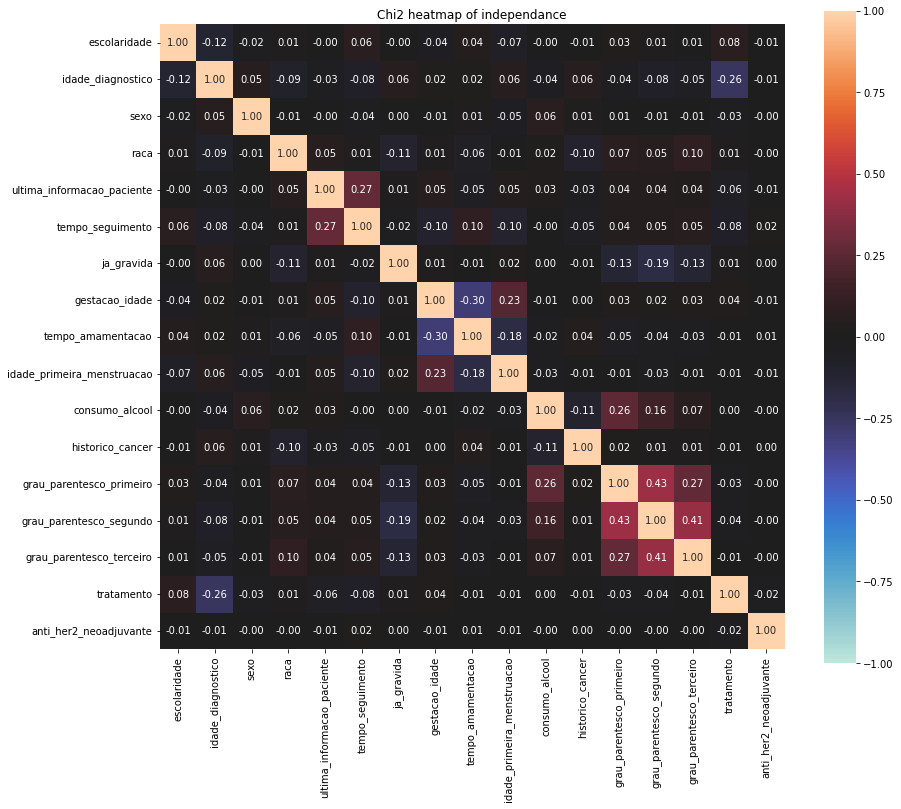

In [122]:
import matplotlib.pyplot as plt
from dython.nominal import associations
associations(df_demograficos_chi2,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

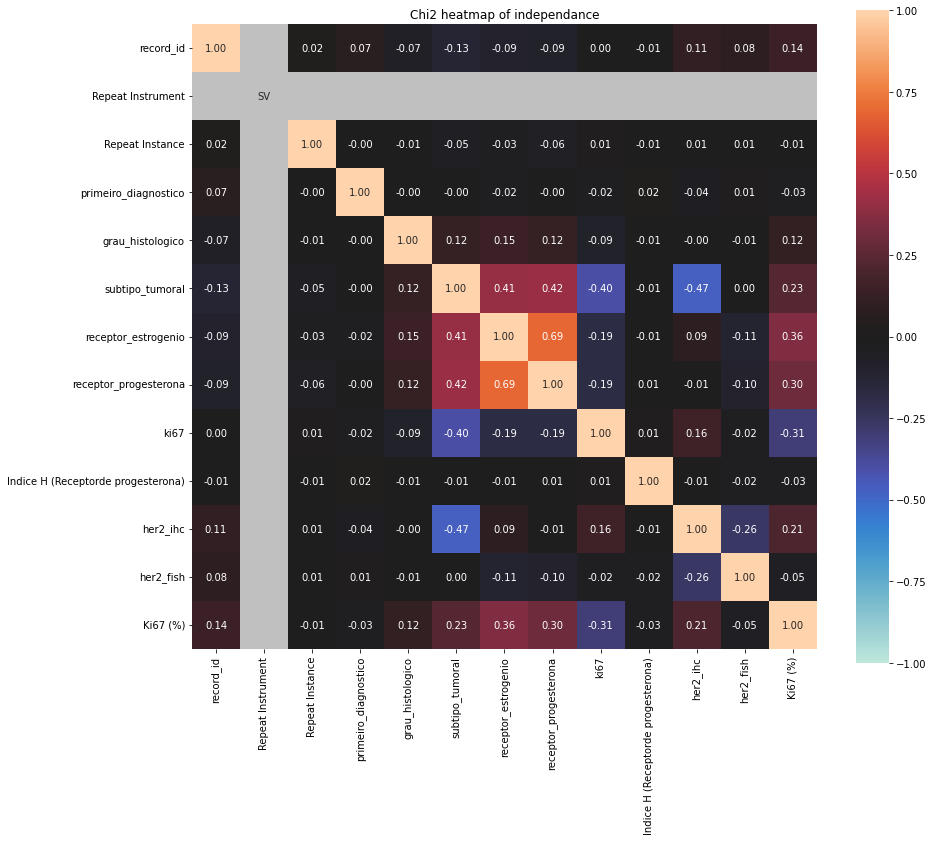

In [123]:
associations(df_histopatologia,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

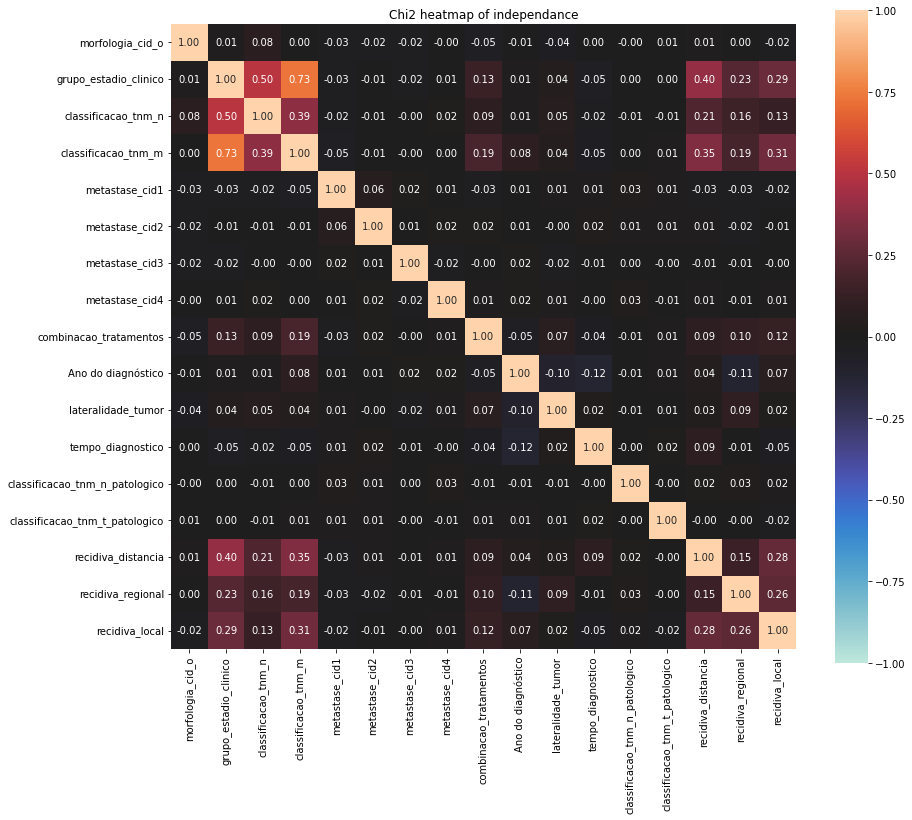

In [124]:
df_registro_tumo.describe()
df_registro_tumo_chi2 = df_registro_tumo[[
    'morfologia_cid_o','grupo_estadio_clinico','classificacao_tnm_n','classificacao_tnm_m','metastase_cid1','metastase_cid2','metastase_cid3','metastase_cid4','combinacao_tratamentos','Ano do diagnóstico',
    'lateralidade_tumor','tempo_diagnostico','classificacao_tnm_n_patologico','classificacao_tnm_t_patologico','recidiva_distancia','recidiva_regional','recidiva_local'
]]
associations(df_registro_tumo_chi2,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

In [60]:
np.random.seed(73)

def exclui_outliers(df, col_name):
    intervalo = 3.4 * df[col_name].std()
    media = df[col_name].mean()
    lower_bound = media - intervalo
    upper_bound = media + intervalo
    df.drop(df[(df[col_name] < lower_bound) | (df[col_name] > upper_bound)].index, inplace=True)

numerical_cols = ['escolaridade', 'idade_diagnostico', 'sexo', 'raca',
       'gestacao_idade', 'tempo_amamentacao',
       'idade_primeira_menstruacao',
       'historico_cancer', 'grau_parentesco_primeiro',
       'grau_parentesco_segundo', 'grau_parentesco_terceiro', 'tratamento',
       'anti_her2_neoadjuvante', 'primeiro_diagnostico', 'grau_histologico',
       'subtipo_tumoral', 'receptor_estrogenio', 'receptor_progesterona',
       'ki67', 'her2_ihc', 'her2_fish', 'morfologia_cid_o',
       'grupo_estadio_clinico', 'classificacao_tnm_n', 'classificacao_tnm_m',
       'metastase_cid1', 'metastase_cid2', 'metastase_cid3', 'metastase_cid4',
       'combinacao_tratamentos', 'lateralidade_tumor',
       'tempo_diagnostico', 'classificacao_tnm_n_patologico',
       'classificacao_tnm_t_patologico', 'recidiva_distancia',
       'recidiva_regional', 'recidiva_local',
       'primeiro_peso', 'primeira_altura',
        'ultimo_IMC', 'diferenca_peso', 'coef_peso',
        'coef_peso_tempo']

for col in numerical_cols:
  exclui_outliers(merged_df, col)

In [125]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4177 entries, 0 to 4176
Data columns (total 73 columns):
 #   Column                                            Non-Null Count  Dtype          
---  ------                                            --------------  -----          
 0   record_id                                         4177 non-null   object         
 1   escolaridade                                      4177 non-null   float64        
 2   idade_diagnostico                                 4177 non-null   float64        
 3   sexo                                              4177 non-null   float64        
 4   raca                                              4177 non-null   float64        
 5   ultima_informacao_paciente                        4177 non-null   float64        
 6   tempo_seguimento                                  4177 non-null   float64        
 7   ja_gravida                                        4177 non-null   float64        
 8   gestacao_idade    

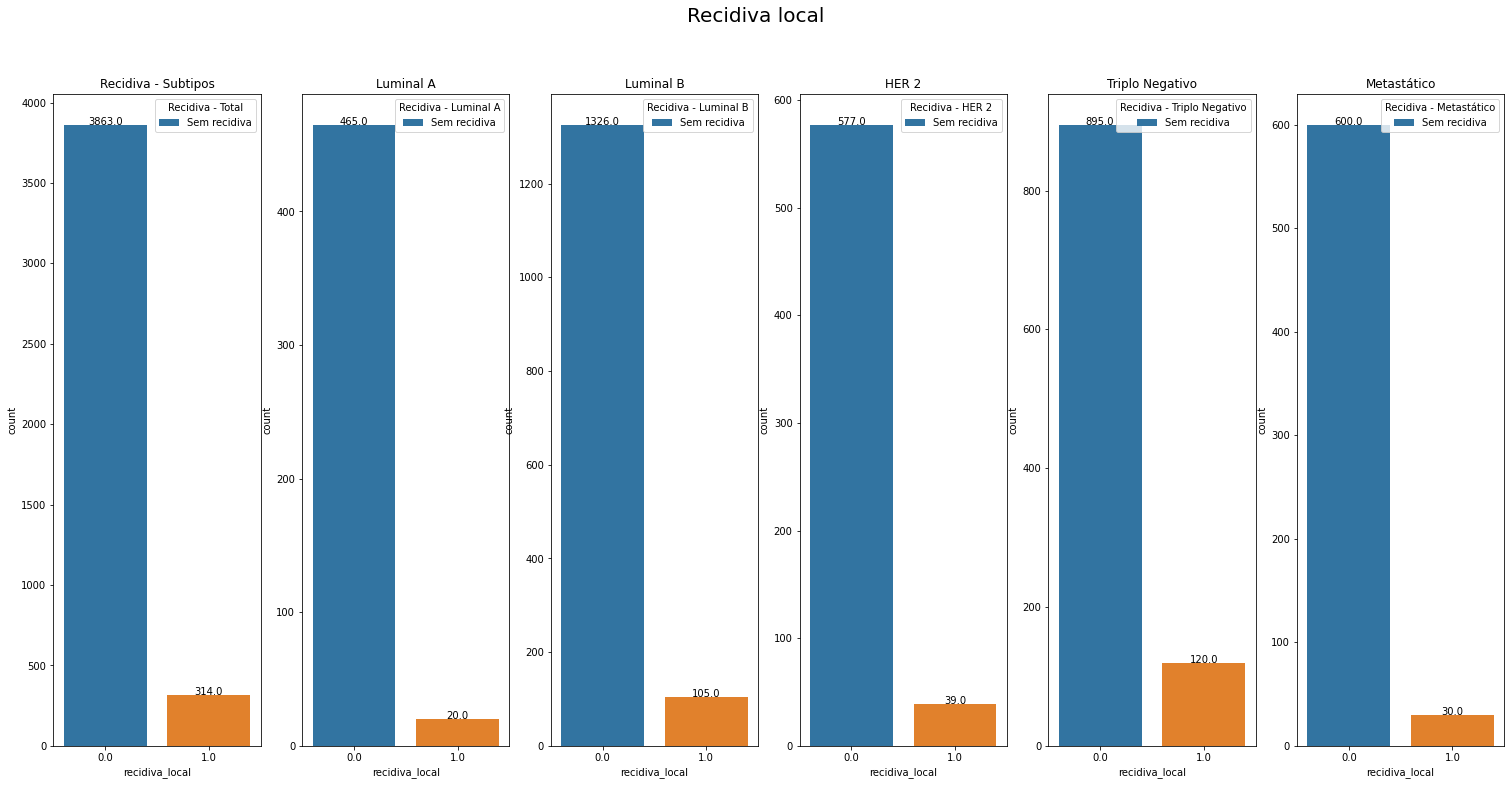

In [126]:
# Criação do grafico relacionando a recidiva local e o subtipo do tummor.

import seaborn as sns

# Definindo os parâmetro para o gráfico
tumor1 = merged_df.query('subtipo_tumoral == 1')
tumor2 = merged_df.query('subtipo_tumoral == 2')
tumor3 = merged_df.query('subtipo_tumoral == 3')
tumor4 = merged_df.query('subtipo_tumoral == 4')
tumor5 = merged_df.query('subtipo_tumoral == 5')

# Plotagem do gráfico
figura = plt.figure(figsize=(26, 12))
figura.suptitle('Recidiva local', fontsize=20)
figura.add_subplot(161)
grafico = sns.countplot(x='recidiva_local', data = merged_df)
grafico.legend(title='Recidiva - Total', loc='upper right', labels=['Sem recidiva', 'Com recidiva'])
plt.title('Recidiva - Subtipos')
plt.show

figura.add_subplot(162)
grafico1 = sns.countplot(x='recidiva_local', data = tumor1)
grafico1.legend(title='Recidiva - Luminal A', loc='upper right', labels=['Sem recidiva', 'Com recidiva'])
plt.title('Luminal A')
plt.show

figura.add_subplot(163)
grafico2 = sns.countplot(x='recidiva_local', data = tumor2)
grafico2.legend(title='Recidiva - Luminal B', loc='upper right', labels=['Sem recidiva', 'Com recidiva'])
plt.title('Luminal B')
plt.show

figura.add_subplot(164)
grafico3 = sns.countplot(x='recidiva_local', data = tumor3)
grafico3.legend(title='Recidiva - HER 2', loc='upper right', labels=['Sem recidiva', 'Com recidiva'])
plt.title('HER 2')
plt.show

figura.add_subplot(165)
grafico4 = sns.countplot(x='recidiva_local', data = tumor4)
grafico4.legend(title='Recidiva - Triplo Negativo', loc='upper right', labels=['Sem recidiva', 'Com recidiva'])
plt.title('Triplo Negativo')
plt.show

figura.add_subplot(166)
grafico5 = sns.countplot(x='recidiva_local', data = tumor5)
grafico5.legend(title='Recidiva - Metastático', loc='upper right', labels=['Sem recidiva', 'Com recidiva'])
plt.title('Metastático')
plt.show

# Medindo o tamanho da coluna e colocando a quantidade de cada item no gráfico.
for i in grafico.patches:
  grafico.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico1.patches:
  grafico1.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico2.patches:
  grafico2.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico3.patches:
  grafico3.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico4.patches:
  grafico4.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico5.patches:
  grafico5.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')

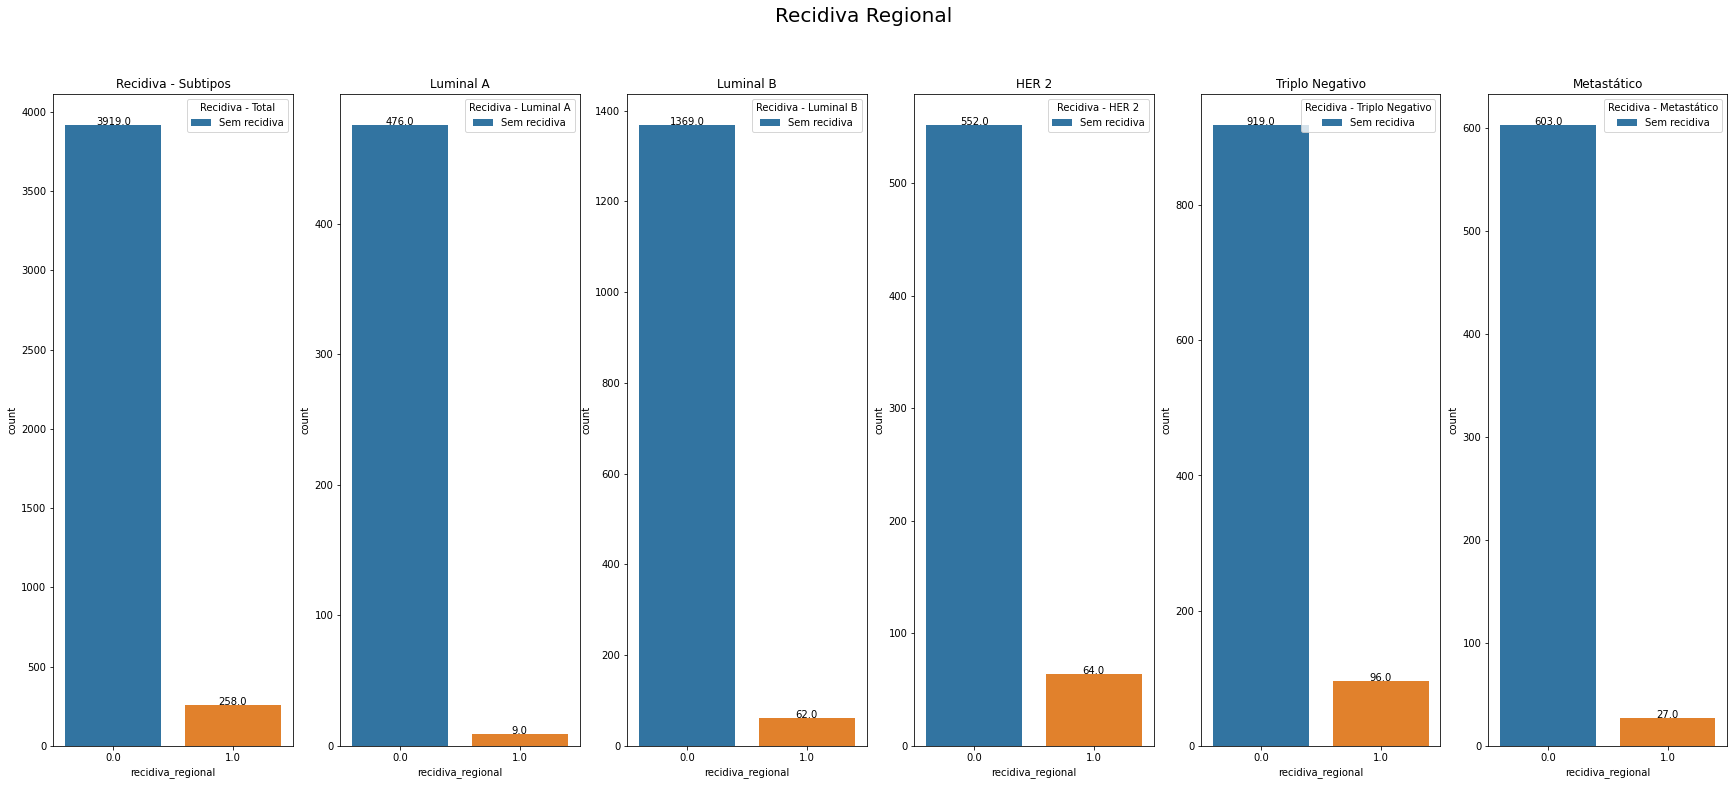

In [127]:
# Criação do grafico relacionando a recidiva regional e o subtipo do tummor.

# Plotagem do gráfico
figura = plt.figure(figsize=(30, 12))
figura.add_subplot(161)
figura.suptitle('Recidiva Regional', fontsize=20)
grafico = sns.countplot(x='recidiva_regional', data = merged_df)
grafico.legend(title='Recidiva - Total', loc='upper right', labels=['Sem recidiva', 'Com recidiva'])
plt.title('Recidiva - Subtipos')
plt.show

figura.add_subplot(162)
grafico1 = sns.countplot(x='recidiva_regional', data = tumor1)
grafico1.legend(title='Recidiva - Luminal A', loc='upper right', labels=['Sem recidiva', 'Com recidiva'])
plt.title('Luminal A')
plt.show

figura.add_subplot(163)
grafico2 = sns.countplot(x='recidiva_regional', data = tumor2)
grafico2.legend(title='Recidiva - Luminal B', loc='upper right', labels=['Sem recidiva', 'Com recidiva'])
plt.title('Luminal B')
plt.show

figura.add_subplot(164)
grafico3 = sns.countplot(x='recidiva_regional', data = tumor3)
grafico3.legend(title='Recidiva - HER 2', loc='upper right', labels=['Sem recidiva', 'Com recidiva'])
plt.title('HER 2')
plt.show

figura.add_subplot(165)
grafico4 = sns.countplot(x='recidiva_regional', data = tumor4)
grafico4.legend(title='Recidiva - Triplo Negativo', loc='upper right', labels=['Sem recidiva', 'Com recidiva'])
plt.title('Triplo Negativo')
plt.show

figura.add_subplot(166)
grafico5 = sns.countplot(x='recidiva_regional', data = tumor5)
grafico5.legend(title='Recidiva - Metastático', loc='upper right', labels=['Sem recidiva', 'Com recidiva'])
plt.title('Metastático')
plt.show

# Medindo o tamanho da coluna e colocando a quantidade de cada item no gráfico.
for i in grafico.patches:
  grafico.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico1.patches:
  grafico1.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico2.patches:
  grafico2.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico3.patches:
  grafico3.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico4.patches:
  grafico4.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico5.patches:
  grafico5.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')

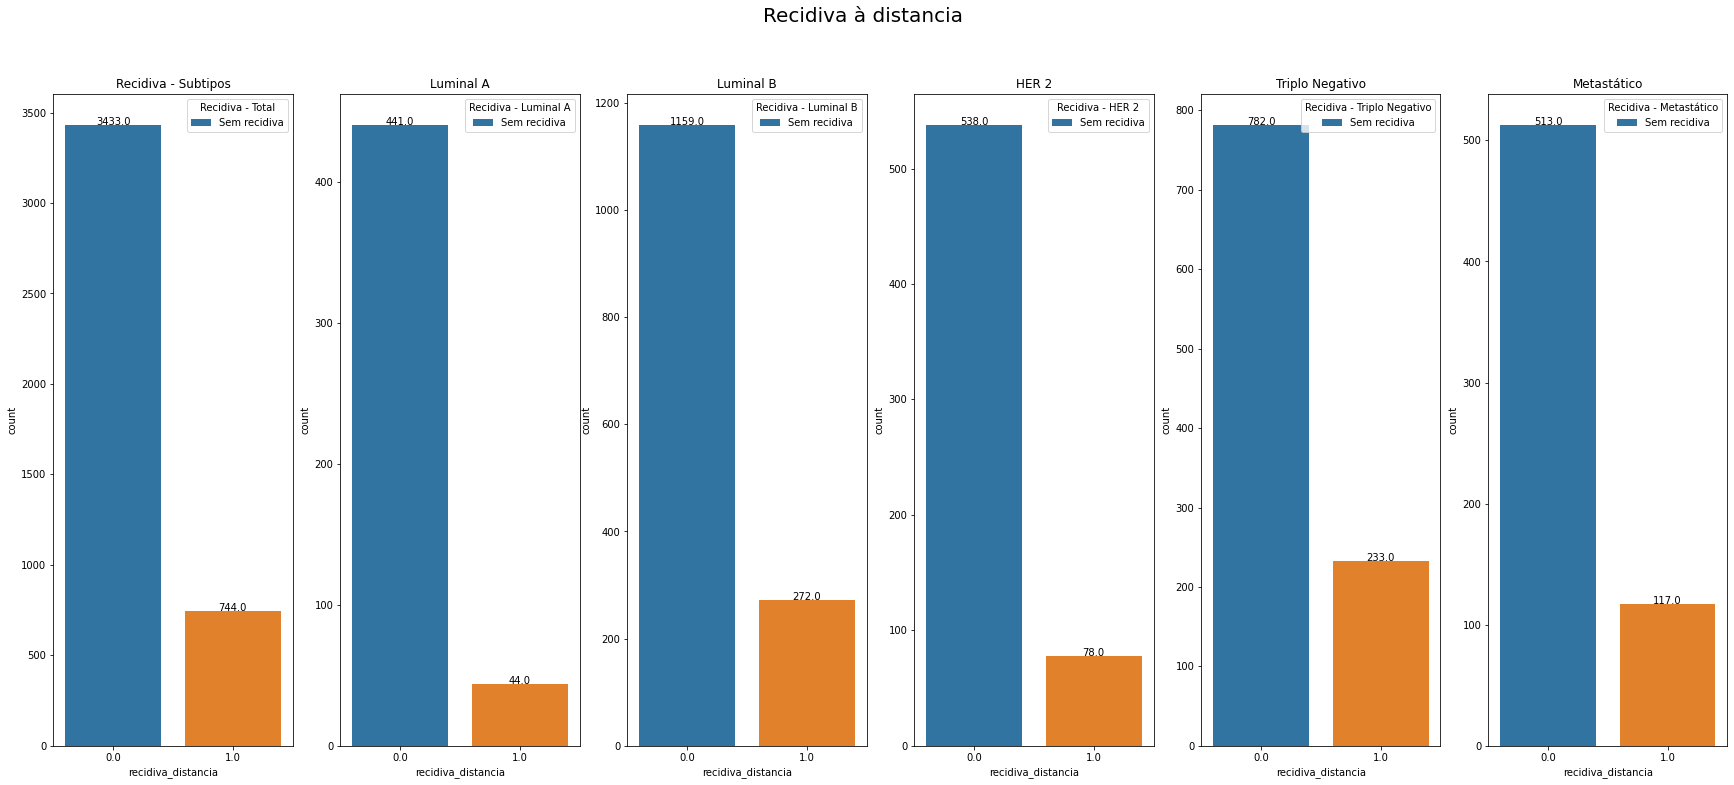

In [128]:
# Criação do grafico relacionando a recidiva à distância e o subtipo do tummor.

# Plotagem do gráfico
figura = plt.figure(figsize=(30, 12))
figura.add_subplot(161)
figura.suptitle('Recidiva à distancia', fontsize=20)
grafico = sns.countplot(x='recidiva_distancia', data = merged_df)
grafico.legend(title='Recidiva - Total', loc='upper right', labels=['Sem recidiva', 'Com recidiva'])
plt.title('Recidiva - Subtipos')
plt.show

figura.add_subplot(162)
grafico1 = sns.countplot(x='recidiva_distancia', data = tumor1)
grafico1.legend(title='Recidiva - Luminal A', loc='upper right', labels=['Sem recidiva', 'Com recidiva'])
plt.title('Luminal A')
plt.show

figura.add_subplot(163)
grafico2 = sns.countplot(x='recidiva_distancia', data = tumor2)
grafico2.legend(title='Recidiva - Luminal B', loc='upper right', labels=['Sem recidiva', 'Com recidiva'])
plt.title('Luminal B')
plt.show

figura.add_subplot(164)
grafico3 = sns.countplot(x='recidiva_distancia', data = tumor3)
grafico3.legend(title='Recidiva - HER 2', loc='upper right', labels=['Sem recidiva', 'Com recidiva'])
plt.title('HER 2')
plt.show

figura.add_subplot(165)
grafico4 = sns.countplot(x='recidiva_distancia', data = tumor4)
grafico4.legend(title='Recidiva - Triplo Negativo', loc='upper right', labels=['Sem recidiva', 'Com recidiva'])
plt.title('Triplo Negativo')
plt.show

figura.add_subplot(166)
grafico5 = sns.countplot(x='recidiva_distancia', data = tumor5)
grafico5.legend(title='Recidiva - Metastático', loc='upper right', labels=['Sem recidiva', 'Com recidiva'])
plt.title('Metastático')
plt.show

# Medindo o tamanho da coluna e colocando a quantidade de cada item no gráfico.
for i in grafico.patches:
  grafico.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico1.patches:
  grafico1.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico2.patches:
  grafico2.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico3.patches:
  grafico3.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico4.patches:
  grafico4.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico5.patches:
  grafico5.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')

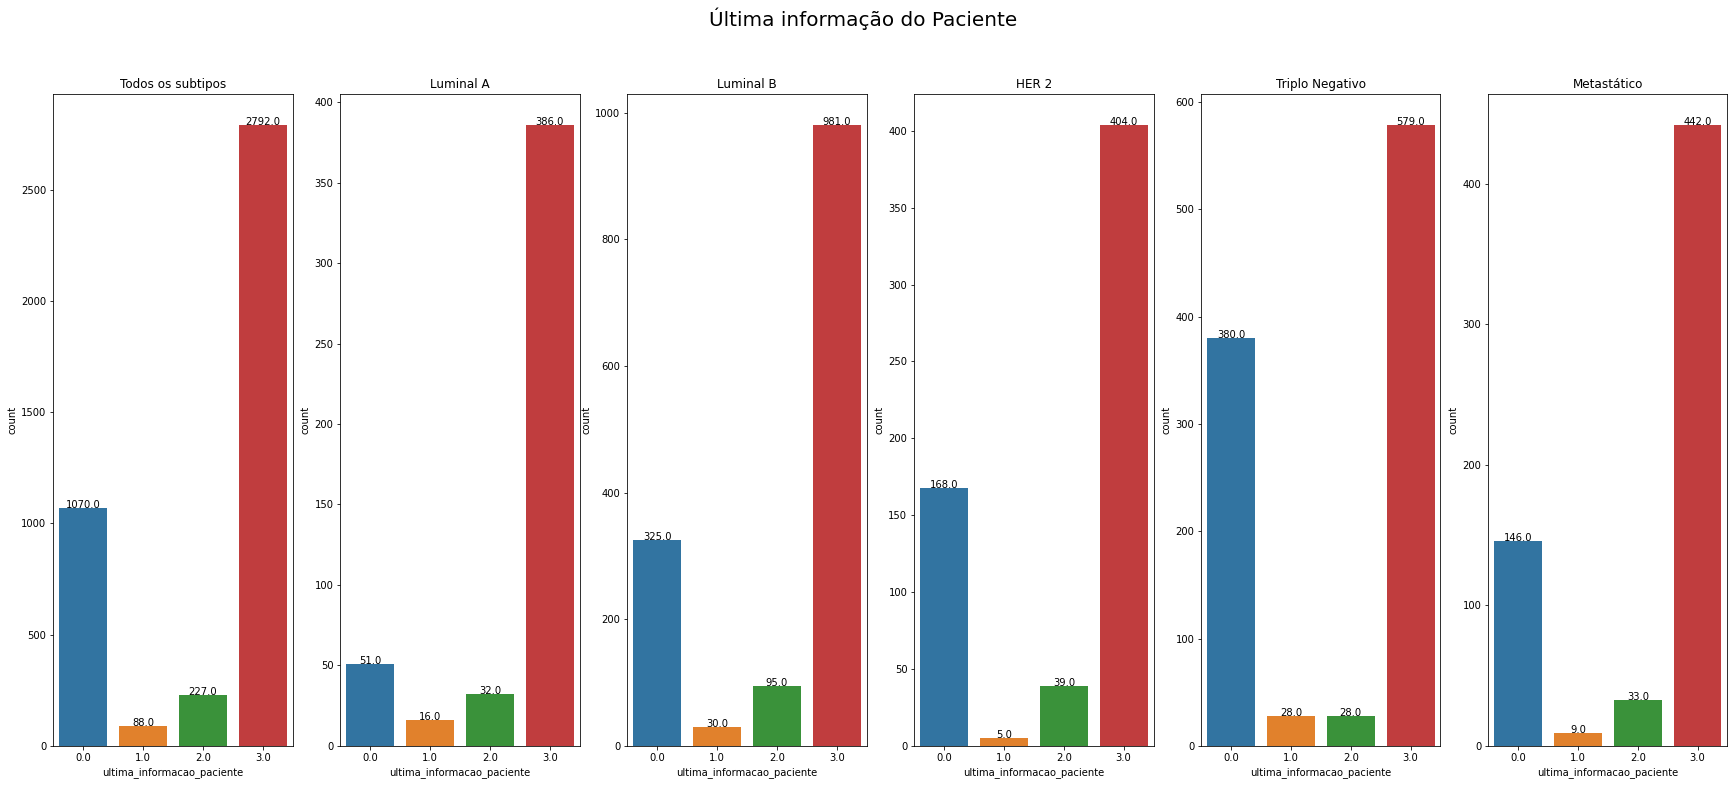

In [129]:
# Criação do grafico relacionando a última informação do paciente e o subtipo do tummor.

# Plotagem do gráfico
figura = plt.figure(figsize=(30, 12))
figura.add_subplot(161)
figura.suptitle('Última informação do Paciente', fontsize=20)
grafico = sns.countplot(x='ultima_informacao_paciente', data = merged_df)
plt.title('Todos os subtipos')
plt.show

figura.add_subplot(162)
grafico1 = sns.countplot(x='ultima_informacao_paciente', data = tumor1)
plt.title('Luminal A')
plt.show

figura.add_subplot(163)
grafico2 = sns.countplot(x='ultima_informacao_paciente', data = tumor2)
plt.title('Luminal B')
plt.show

figura.add_subplot(164)
grafico3 = sns.countplot(x='ultima_informacao_paciente', data = tumor3)
plt.title('HER 2')
plt.show

figura.add_subplot(165)
grafico4 = sns.countplot(x='ultima_informacao_paciente', data = tumor4)
plt.title('Triplo Negativo')
plt.show

figura.add_subplot(166)
grafico5 = sns.countplot(x='ultima_informacao_paciente', data = tumor5)
plt.title('Metastático')
plt.show

# Medindo o tamanho da coluna e colocando a quantidade de cada item no gráfico.
for i in grafico.patches:
  grafico.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico1.patches:
  grafico1.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico2.patches:
  grafico2.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico3.patches:
  grafico3.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico4.patches:
  grafico4.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')
  
for i in grafico5.patches:
  grafico5.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center')

In [130]:
#grau de parentesco primeiro tem muito a ver com o segundo e com o terceiro logo o cancer tem uma relação muito forte com a genetica
#receptor de progesterona esta estritamente relacionado a receptor de testosterona

merged_df.columns

Index(['record_id', 'escolaridade', 'idade_diagnostico', 'sexo', 'raca',
       'ultima_informacao_paciente', 'tempo_seguimento', 'ja_gravida',
       'gestacao_idade', 'tempo_amamentacao',
       'grau_parentesco_mama_primeiro_1_vez',
       'grau_parentesco_mama_primeiro_mais_vezes',
       'grau_parentesco_mama_segundo_1_vez',
       'grau_parentesco_mama_segundo_mais_vezes', 'idade_primeira_menstruacao',
       'uso_anticoncepcional', 'atividade_fisica', 'consumo_alcool',
       'historico_cancer', 'grau_parentesco_primeiro',
       'grau_parentesco_segundo', 'grau_parentesco_terceiro', 'tratamento',
       'anti_her2_neoadjuvante', 'Repeat Instrument', 'Repeat Instance',
       'primeiro_diagnostico', 'grau_histologico', 'subtipo_tumoral',
       'receptor_estrogenio', 'receptor_progesterona', 'ki67',
       'Indice H (Receptorde progesterona)', 'her2_ihc', 'her2_fish',
       'Ki67 (%)', 'Data da primeira consulta institucional [dt_pci]',
       'Data do diagnóstico', 'cid_o', 'm

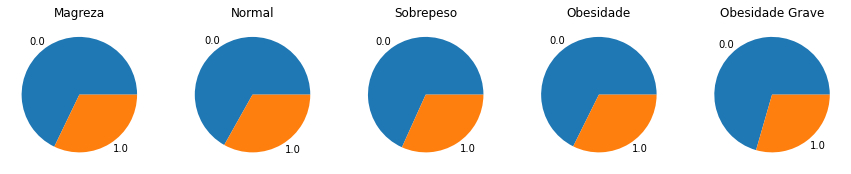

'\nAqui podemos observar que o Índice de Massa Corporal (IMC) influencia no tipo de tratamento escolhido. Quanto maior o IMC,\nmaior a probabilidade de o tratamento ser neoadjuvante, o que faz sentido, pois a cirurgia é mais difícil de ser realizada\nem pessoas com maior índice de gordura corporal.\n'

In [131]:
'''
Aqui podemos observar que o Índice de Massa Corporal (IMC) influencia no tipo de tratamento escolhido.
'''

# Dividindo a figura em 1 linha e 5 colunas para os subplots
fig, axs = plt.subplots(1, 5, figsize=(15, 5))

# Definindo os dados e rótulos para cada faixa de IMC
magreza = merged_df.query("primeiro_IMC < 18.5")
normal = merged_df.query("primeiro_IMC < 24.9 and primeiro_IMC > 18.5")
sobrepeso = merged_df.query("primeiro_IMC < 29.9 and primeiro_IMC > 24.9")
obesidade = merged_df.query("primeiro_IMC < 39.9 and primeiro_IMC > 29.9")
obesidade_grave = merged_df.query("primeiro_IMC > 39.9")

counts = magreza['tratamento'].value_counts()
counts2 = normal['tratamento'].value_counts()
counts3 = sobrepeso['tratamento'].value_counts()
counts4 = obesidade['tratamento'].value_counts()
counts5 = obesidade_grave['tratamento'].value_counts()

# Plotando os gráficos de pizza em cada subplot
axs[0].pie(counts, labels=counts.index)
axs[0].set_title('Magreza')

axs[1].pie(counts2, labels=counts2.index)
axs[1].set_title('Normal')

axs[2].pie(counts3, labels=counts3.index)
axs[2].set_title('Sobrepeso')

axs[3].pie(counts4, labels=counts4.index)
axs[3].set_title('Obesidade')

axs[4].pie(counts5, labels=counts5.index)
axs[4].set_title('Obesidade Grave')

plt.show()

'''
Aqui podemos observar que o Índice de Massa Corporal (IMC) influencia no tipo de tratamento escolhido. Quanto maior o IMC,
maior a probabilidade de o tratamento ser neoadjuvante, o que faz sentido, pois a cirurgia é mais difícil de ser realizada
em pessoas com maior índice de gordura corporal.
'''

'\nEssa hipótese foi confirmada de acordo com o gráfico abaixo, uma vez que a tendência do tempo\nde seguimento é aumentar quanto maior o nível de escolaridade, com uma diminuição de variação\na partir do EF completo.\n'

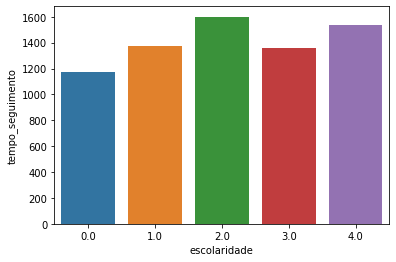

In [132]:
'''
A escolaridade pode influenciar o tempo de seguimento do tratamento
'''
# calculando a média dos valores de tempo_seguimento para cada nível de escolaridade
media_por_escolaridade = merged_df.groupby('escolaridade')['tempo_seguimento'].mean().reset_index()

# plotando o histograma
sns.barplot(data=media_por_escolaridade, x='escolaridade', y='tempo_seguimento')

'''
Essa hipótese foi confirmada de acordo com o gráfico abaixo, uma vez que a tendência do tempo
de seguimento é aumentar quanto maior o nível de escolaridade, com uma diminuição de variação
a partir do EF completo.
'''

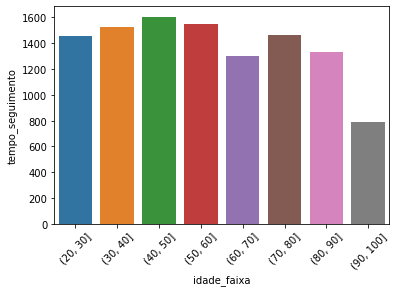

'\nDe acordo com o gráfico abaixo, existe uma tendência de que quanto mais velho o paciente,\nmenor será o tempo de seguimento.\n'

In [133]:
'''
A idade do paciente pode afetar a duração do acompanhamento
'''

# Criando a coluna com as faixas de idade
merged_df['idade_faixa'] = pd.cut(merged_df['idade_diagnostico'], bins=range(20, 101, 10))

# Agrupando por faixa de idade e calculando a média do tempo de seguimento
media_por_faixa = merged_df.groupby('idade_faixa')['tempo_seguimento'].mean().reset_index()

# Plotando o gráfico de barras
sns.barplot(data=media_por_faixa, x='idade_faixa', y='tempo_seguimento')
plt.xticks(rotation=45)
plt.show()

'''
De acordo com o gráfico abaixo, existe uma tendência de que quanto mais velho o paciente,
menor será o tempo de seguimento.
'''